In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
def plotTimeInterval(data, stations_plot, days_start=1, days_end=30, ylabel="Energy per period (kWh/period)"):

    plt.figure(figsize=(10,4))
    for stat in stations_plot:
        column_name = 'Power_'+stat
        
        start = data.index[0] + pd.DateOffset(days=days_start-1)
        end = data.index[0] + pd.DateOffset(days=days_end-1)
        plt.plot(data.loc[start:end].index, data.loc[start:end][column_name])
        
    plt.title(f"Days {days_start} - {days_end}: {stat}", size = 18)
    plt.ylabel(ylabel, size = 12)
    plt.xlabel("Time", size = 12)
    plt.legend(stations_plot)
    plt.show()

In [4]:
# Seleccionamos HISTORIC DATA 2019 ELECTROLINERES AMB.csv porque Charge2019_EV_AMB.csv no tiene la hora
Colo_data = pd.read_csv("Electric_Vehicle_Charging_Station_Data.csv", sep=",")
Colo_data.columns

Index(['ObjectId2', 'Station_Name', 'Address', 'City', 'State_Province',
       'Zip_Postal_Code', 'Start_Date___Time', 'Start_Time_Zone',
       'End_Date___Time', 'End_Time_Zone', 'Total_Duration__hh_mm_ss_',
       'Charging_Time__hh_mm_ss_', 'Energy__kWh_', 'GHG_Savings__kg_',
       'Gasoline_Savings__gallons_', 'Port_Type', 'ObjectID'],
      dtype='object')

In [5]:
# Número de datos
print(f"Número de cargas (antes de limpiar): {len(Colo_data)}")

# Número de electrolineras
print(f"Número de electrolineras: {len(Colo_data['Station_Name'].unique())}")

Número de cargas (antes de limpiar): 70194
Número de electrolineras: 40


In [6]:
# Seleccionamos solo algunas columnas
Colo_data = Colo_data[['Station_Name','Start_Date___Time','Charging_Time__hh_mm_ss_','Energy__kWh_']]
Colo_data = Colo_data.rename(columns={"Station_Name": "Station", "Start_Date___Time": "Start",
                                              "Energy__kWh_": "Energy_kWh", "Charging_Time__hh_mm_ss_": "Duration"})
Colo_data.head()

Station           Start Duration  Energy_kWh
0  BOULDER / JUNCTION ST1  1/1/2018 17:49  2:02:44       6.504
1  BOULDER / JUNCTION ST1   1/2/2018 8:52  0:24:19       2.481
2  BOULDER / JUNCTION ST1  1/2/2018 21:11  3:40:52      15.046
3    BOULDER / ALPINE ST1   1/3/2018 9:19  1:54:29       6.947
4  BOULDER / BASELINE ST1  1/3/2018 14:13  0:16:44       1.800

In [7]:
# Eliminamos los 0s
Colo_data = Colo_data[Colo_data['Energy_kWh'] != 0]
Colo_data.head()

Station           Start Duration  Energy_kWh
0  BOULDER / JUNCTION ST1  1/1/2018 17:49  2:02:44       6.504
1  BOULDER / JUNCTION ST1   1/2/2018 8:52  0:24:19       2.481
2  BOULDER / JUNCTION ST1  1/2/2018 21:11  3:40:52      15.046
3    BOULDER / ALPINE ST1   1/3/2018 9:19  1:54:29       6.947
4  BOULDER / BASELINE ST1  1/3/2018 14:13  0:16:44       1.800

In [8]:
# Número de datos
print(f"Número de cargas (después de limpiar): {len(Colo_data)}")

# Número de electrolineras
print(f"Número de electrolineras: {len(Colo_data['Station'].unique())}")

Número de cargas (después de limpiar): 62884
Número de electrolineras: 40


In [9]:
12//5

2

In [10]:
# Convertimos fecha en datetime
Colo_data['Start'] = pd.to_datetime(Colo_data['Start'], format="mixed")  #primer formato: "%m/%d/%Y %H:%M"

# Pasamos de %H:%M:%S a segundos
Colo_data['Duration_min'] = pd.to_timedelta(Colo_data['Duration']).dt.total_seconds()//60
Colo_data.drop(columns=['Duration'], inplace=True)

# Reordenamos índices
Colo_data = Colo_data.sort_values(by="Start").reset_index(drop=True)

Colo_data

Station               Start  Energy_kWh  Duration_min
0        BOULDER / JUNCTION ST1 2018-01-01 17:49:00       6.504         122.0
1        BOULDER / JUNCTION ST1 2018-01-02 08:52:00       2.481          24.0
2        BOULDER / JUNCTION ST1 2018-01-02 21:11:00      15.046         220.0
3          BOULDER / ALPINE ST1 2018-01-03 09:19:00       6.947         114.0
4        BOULDER / BASELINE ST1 2018-01-03 14:13:00       1.800          16.0
...                         ...                 ...         ...           ...
62879        BOULDER / EAST REC 2023-08-31 19:40:26      17.100         170.0
62880      BOULDER / ALPINE ST1 2023-08-31 19:50:45       4.510          91.0
62881  BOULDER / REC CENTER ST2 2023-08-31 20:04:23      18.517         188.0
62882      BOULDER / ATRIUM ST1 2023-08-31 21:09:00       5.931          94.0
62883     BOULDER / VALMONT ST1 2023-08-31 21:14:46       7.499          66.0

[62884 rows x 4 columns]

In [11]:
sum(Colo_data['Duration_min']==0)

511

In [12]:
Colo_data = Colo_data[Colo_data['Duration_min'].between(1, 2000)]

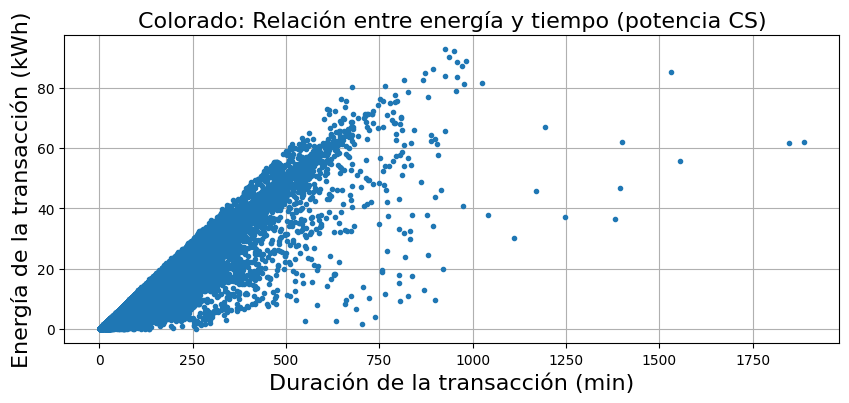

In [13]:
plt.figure(figsize=(10,4))
plt.plot(Colo_data['Duration_min'],Colo_data['Energy_kWh'],'.')
plt.title("Colorado: Relación entre energía y tiempo (potencia CS)", size = 16)
plt.ylabel("Energía de la transacción (kWh)", size = 16)
plt.xlabel("Duración de la transacción (min)", size = 16)
plt.grid()
plt.show()

In [14]:
Colo_data["Power"] = round(Colo_data["Energy_kWh"]/Colo_data["Duration_min"], 4) # kWh/min

/var/folders/b_/0wttc4ks4h3bgdql8lyklvsm0000gn/T/ipykernel_92755/4046156186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Colo_data["Power"] = round(Colo_data["Energy_kWh"]/Colo_data["Duration_min"], 4) # kWh/min


In [15]:
Colo_data

Station               Start  Energy_kWh  Duration_min  \
0        BOULDER / JUNCTION ST1 2018-01-01 17:49:00       6.504         122.0   
1        BOULDER / JUNCTION ST1 2018-01-02 08:52:00       2.481          24.0   
2        BOULDER / JUNCTION ST1 2018-01-02 21:11:00      15.046         220.0   
3          BOULDER / ALPINE ST1 2018-01-03 09:19:00       6.947         114.0   
4        BOULDER / BASELINE ST1 2018-01-03 14:13:00       1.800          16.0   
...                         ...                 ...         ...           ...   
62879        BOULDER / EAST REC 2023-08-31 19:40:26      17.100         170.0   
62880      BOULDER / ALPINE ST1 2023-08-31 19:50:45       4.510          91.0   
62881  BOULDER / REC CENTER ST2 2023-08-31 20:04:23      18.517         188.0   
62882      BOULDER / ATRIUM ST1 2023-08-31 21:09:00       5.931          94.0   
62883     BOULDER / VALMONT ST1 2023-08-31 21:14:46       7.499          66.0   

        Power  
0      0.0533  
1      0.1034  
2      0.0684  
3      0.0609  
4      0.1125  
...       ...  
62879  0.1006  
62880  0.0496  
62881  0.0985  
62882  0.0631  
62883  0.1136  

[62371 rows x 5 columns]

In [16]:
# Creamos una serie con todos los instantes de tiempo (cada segundo) de todo el mes
start = pd.Timestamp('2018-01-01 00:00:00')
end = pd.Timestamp('2023-08-31 23:59:59')
Colo_all_secs = pd.period_range(start=start, end=end, freq='min').to_timestamp()

Colo_stations = Colo_data['Station'].unique()
print(f"Number of Stations: {len(Colo_stations)}")

Number of Stations: 40


In [17]:
# Creamos el dataset con la potencia de la estación en cada momento del tiempo
Colo_cont = pd.DataFrame(index=Colo_all_secs)

# Por cada estación
for stat in Colo_stations:
    print(stat)
    new_column_name = 'Power_' +stat 
    Colo_cont[new_column_name] = 0
    
    # Llenamos el dataset con la información de las recargas
    for charge in Colo_data[Colo_data['Station']==stat].itertuples():
        start = charge.Start
        end = start + pd.DateOffset(minutes=charge.Duration_min)
        
        Colo_cont.loc[start:end, new_column_name] += charge.Power

BOULDER / JUNCTION ST1
BOULDER / ALPINE ST1
BOULDER / BASELINE ST1
BOULDER / FACILITIES ST1
COMM VITALITY / 1500PEARL2
BOULDER / ATRIUM ST1
BOULDER / REC CENTER ST2
COMM VITALITY / 1000WALNUT2
BOULDER / REC CENTER ST1
COMM VITALITY / 1500PEARL1
COMM VITALITY / 1104 SPRUCE1
COMM VITALITY / 1400 WALNUT1
COMM VITALITY / 1000WALNUT1
COMM VITALITY / BOULDER JCTN
COMM VITALITY / 1100WALNUT1
BOULDER / BOULDER PARK S2
BOULDER / N BOULDER REC 1
BOULDER / BOULDER PARK S1
COMM VITALITY / 2200 BROADWAY1
BOULDER / EAST REC
BOULDER / ANNEX ST1
BOULDERJUNCTION / JUNCTION ST1
BOULDER / RESERVOIR ST1
BOULDER / RESERVOIR ST2
BOULDER / CARPENTER PARK1
BOULDER / CARPENTER PARK2
BOULDER / AIRPORT ST1
COMM VITALITY / 5050 PEARL 1
BOULDER / VALMONT ST2
BOULDER / VALMONT ST1
BOULDER / OSMP FLEET 1
BOULDER / OSMP FLEET 2
MUNICIPAL SC / 1500PEARL2
MUNICIPAL SC / 1000WALNUT1
MUNICIPAL SC / 1100WALNUT1
MUNICIPAL SC / 1104 SPRUCE1
MUNICIPAL SC / 1400 WALNUT1
MUNICIPAL SC / 1000WALNUT2
MUNICIPAL SC / 2200 BROADWAY1

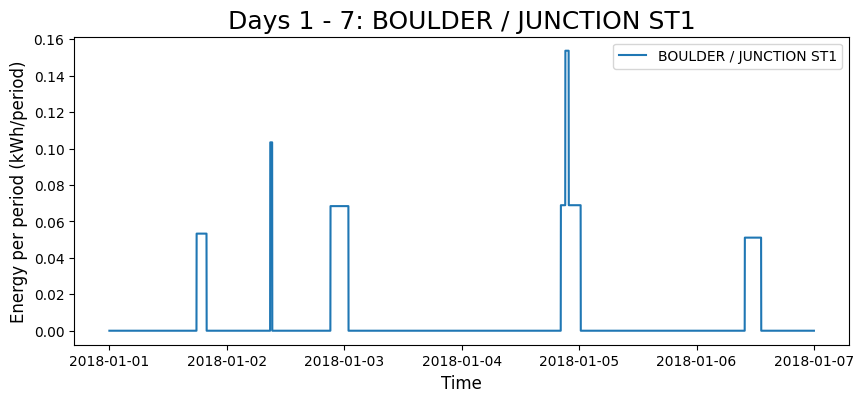

In [18]:
plotTimeInterval(Colo_cont, Colo_stations[0:1], days_start=1, days_end=7)

## Agrupamos por días

In [61]:
Colo_1d = Colo_cont.groupby(pd.Grouper(freq='1D')).sum()
Colo_1d

Power_BOULDER / JUNCTION ST1  Power_BOULDER / ALPINE ST1  \
2018-01-01                        6.5559                      0.0000   
2018-01-02                       14.1446                      0.0000   
2018-01-03                        3.5568                      9.5907   
2018-01-04                       18.9952                      0.0000   
2018-01-05                        1.3780                      0.0000   
...                                  ...                         ...   
2023-08-27                        0.0000                     27.3384   
2023-08-28                        0.0000                     46.8097   
2023-08-29                        0.0000                     33.7317   
2023-08-30                        0.0000                      3.3867   
2023-08-31                        0.0000                     10.1472   

            Power_BOULDER / BASELINE ST1  Power_BOULDER / FACILITIES ST1  \
2018-01-01                        0.0000                          0.0000   
2018-01-02                        0.0000                          0.0000   
2018-01-03                        1.9125                          0.0000   
2018-01-04                       11.1324                         18.6624   
2018-01-05                        3.0436                          0.0000   
...                                  ...                             ...   
2023-08-27                       34.2875                          0.0000   
2023-08-28                       16.0300                         54.8332   
2023-08-29                       88.4984                          0.0000   
2023-08-30                       78.7589                          0.0000   
2023-08-31                       90.1692                         24.4072   

            Power_COMM VITALITY / 1500PEARL2  Power_BOULDER / ATRIUM ST1  \
2018-01-01                               0.0                      0.0000   
2018-01-02                               0.0                      0.0000   
2018-01-03                               0.0                      0.0000   
2018-01-04                               0.0                      0.0000   
2018-01-05                               0.0                      0.0000   
...                                      ...                         ...   
2023-08-27                               0.0                     41.3108   
2023-08-28                               0.0                      0.0000   
2023-08-29                               0.0                     42.6111   
2023-08-30                               0.0                      5.7062   
2023-08-31                               0.0                     54.5224   

            Power_BOULDER / REC CENTER ST2  Power_COMM VITALITY / 1000WALNUT2  \
2018-01-01                          0.0000                                0.0   
2018-01-02                          0.0000                                0.0   
2018-01-03                          0.0000                                0.0   
2018-01-04                          0.0000                                0.0   
2018-01-05                          0.0000                                0.0   
...                                    ...                                ...   
2023-08-27                          0.0000                                0.0   
2023-08-28                         84.2952                                0.0   
2023-08-29                         42.4106                                0.0   
2023-08-30                         53.1744                                0.0   
2023-08-31                         90.1152                                0.0   

            Power_BOULDER / REC CENTER ST1  Power_COMM VITALITY / 1500PEARL1  \
2018-01-01                          0.0000                               0.0   
2018-01-02                          0.0000                               0.0   
2018-01-03                          0.0000                               0.0   
2018-01-04                  

In [62]:
Colo_cont.isnull().sum().sum(), Colo_1d.isnull().sum().sum()

(0, 0)

In [63]:
means = Colo_1d.mean().sort_index()
means.index =  means.index.str.replace('Power_','')

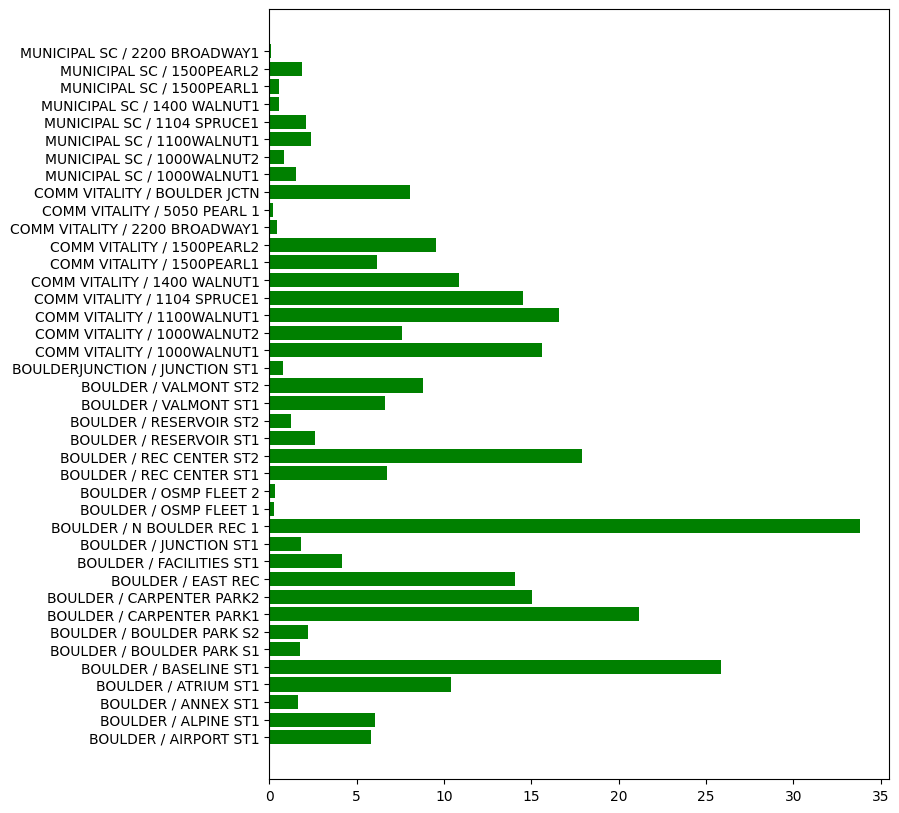

In [64]:
fig = plt.figure(1, figsize=(8,10))
plt.barh(means.index, means.values, color='g')
plt.show()

In [65]:
Colo_stations[[2]]

array(['BOULDER / BASELINE ST1'], dtype=object)

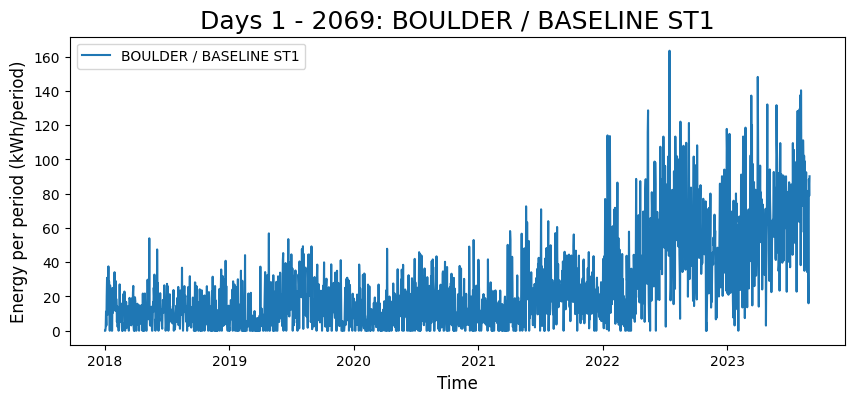

In [66]:
plotTimeInterval(Colo_1d, Colo_stations[[2]], days_start=1, days_end=len(Colo_1d))

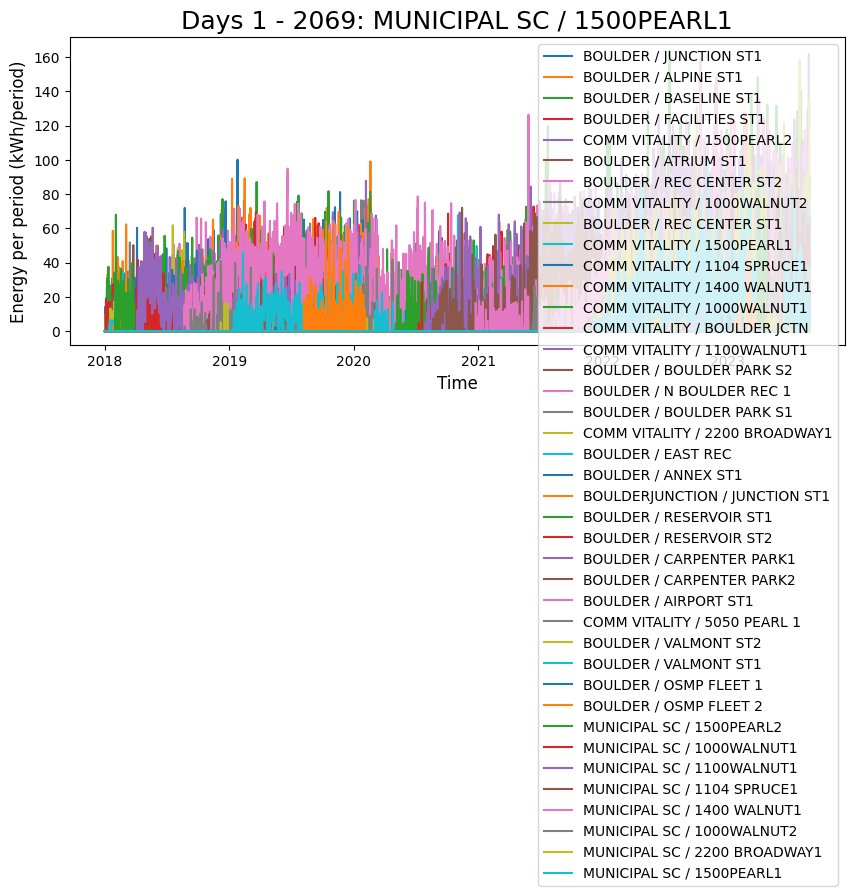

In [67]:
plotTimeInterval(Colo_1d, Colo_stations, days_start=1, days_end=len(Colo_1d))

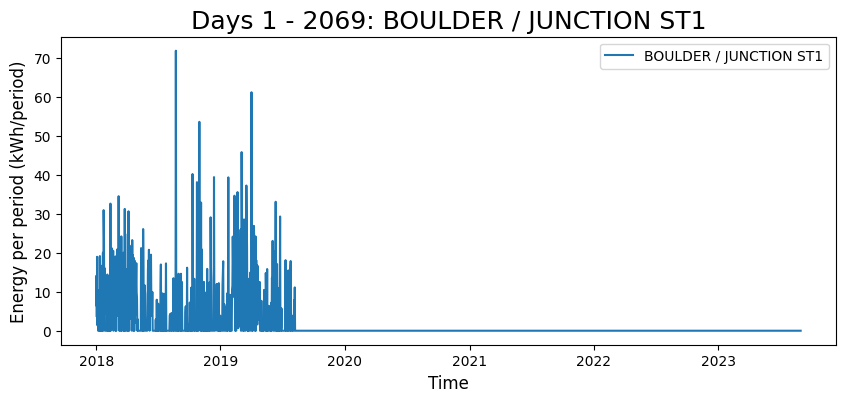

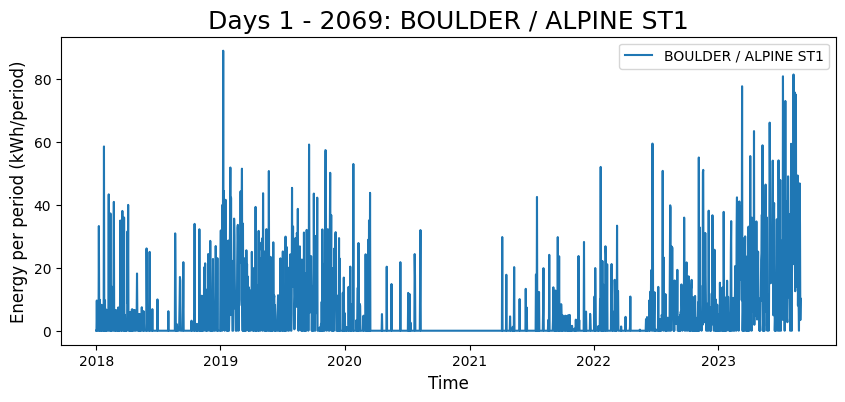

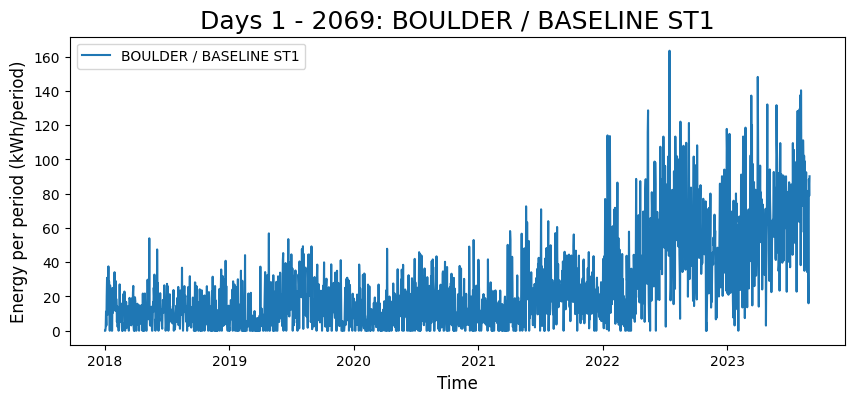

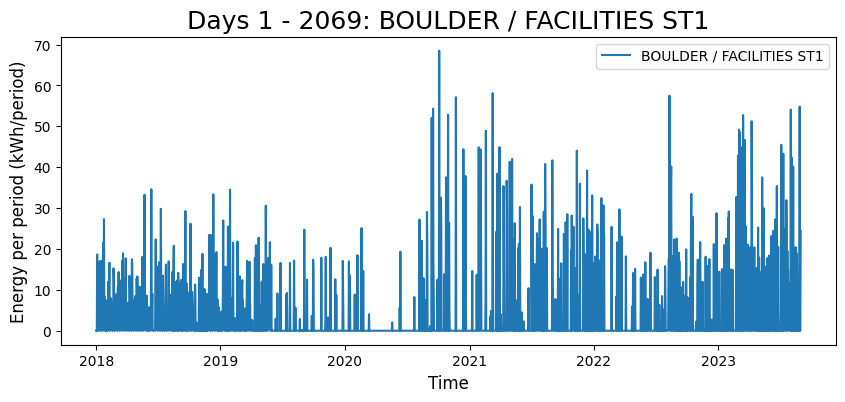

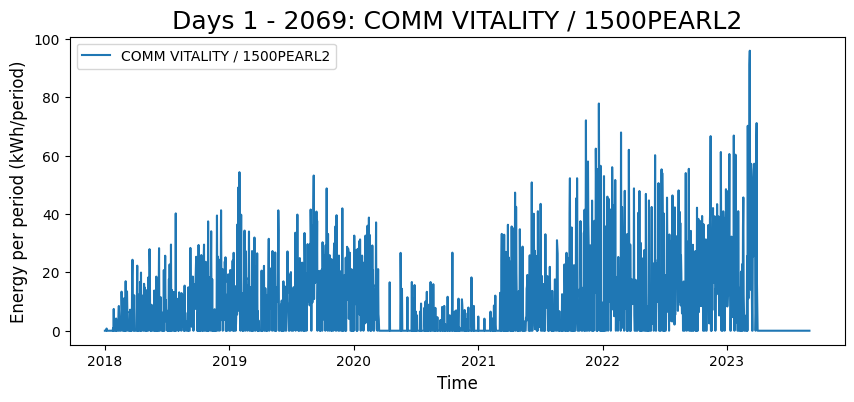

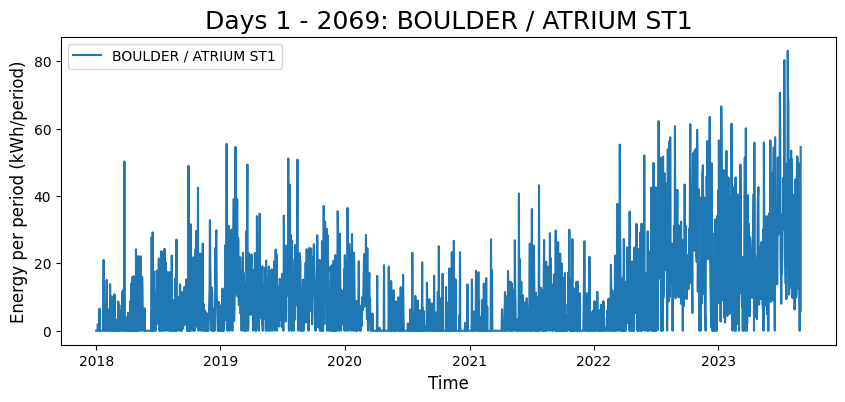

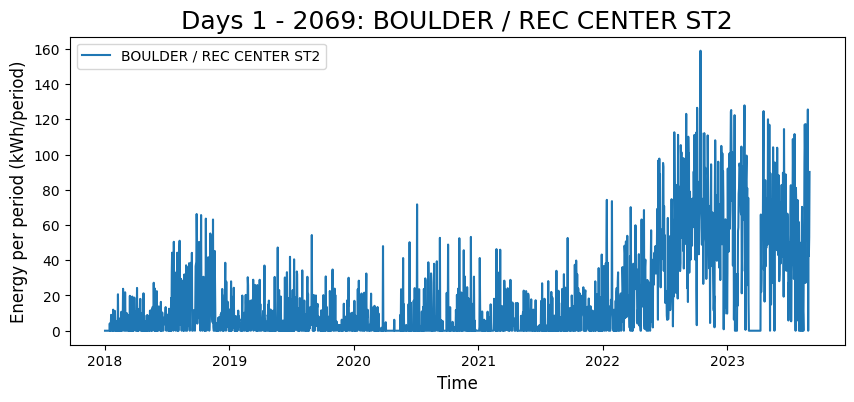

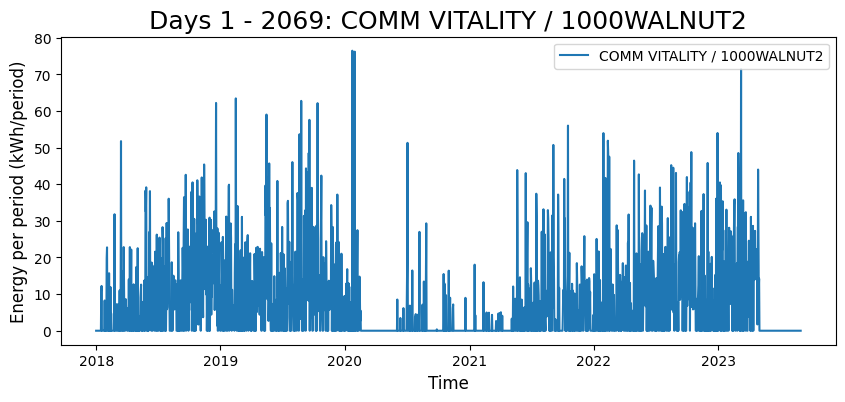

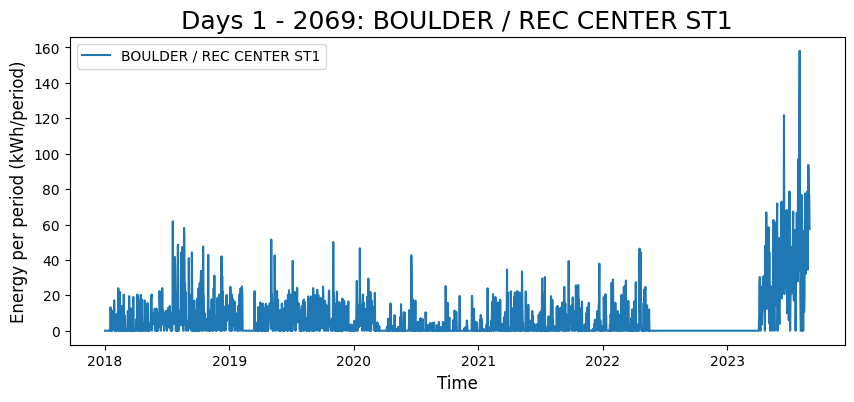

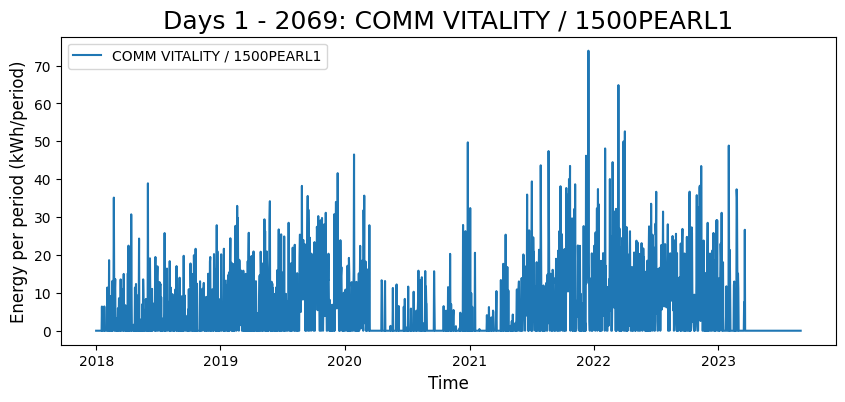

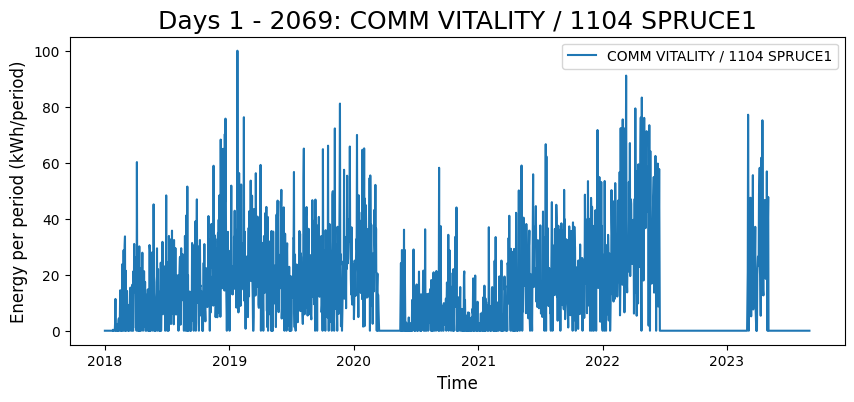

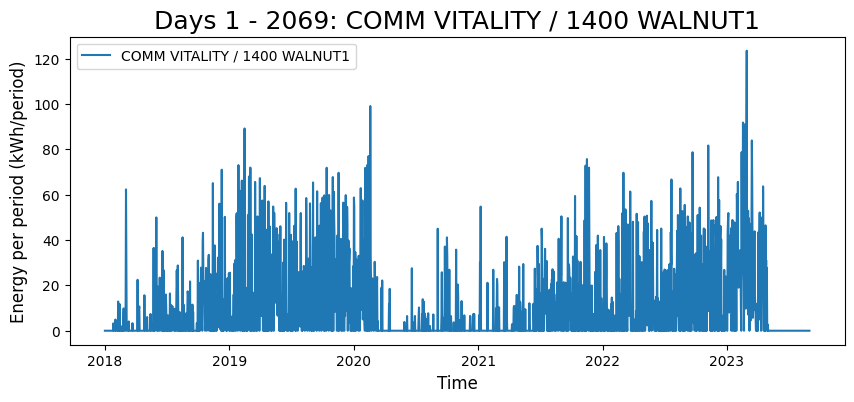

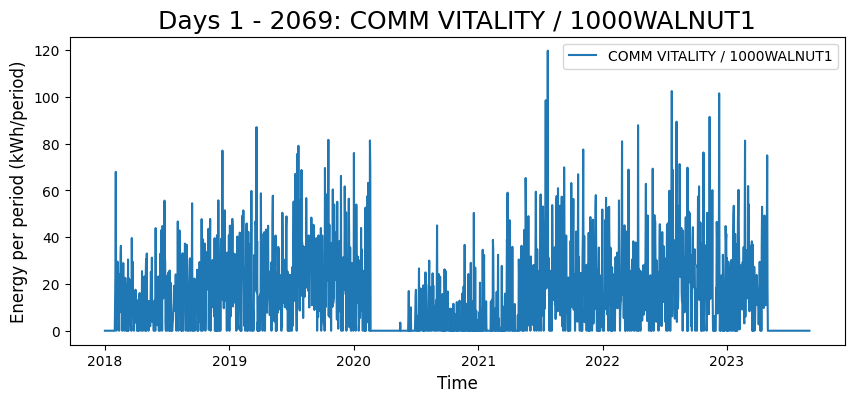

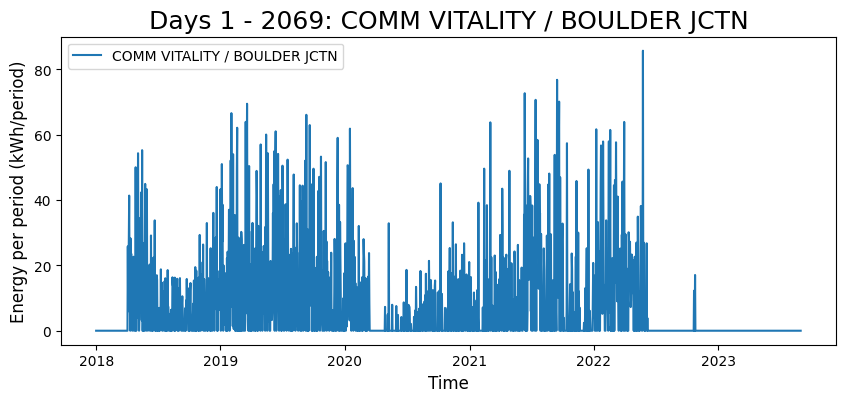

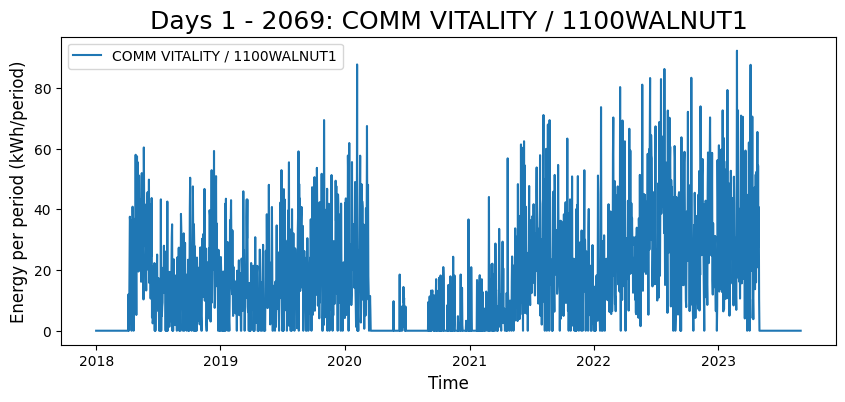

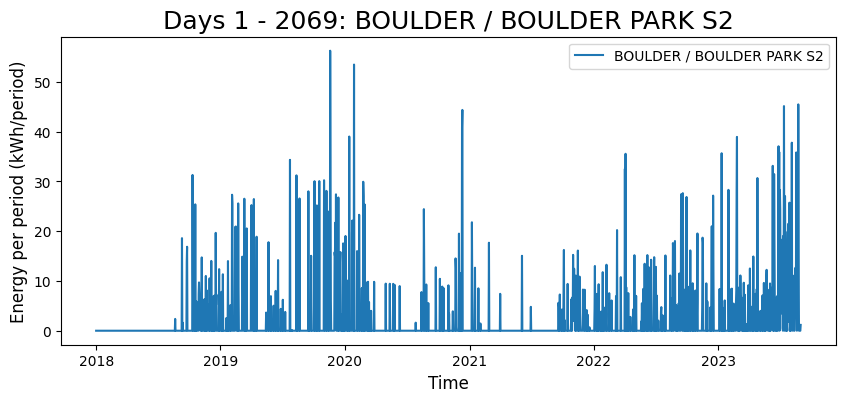

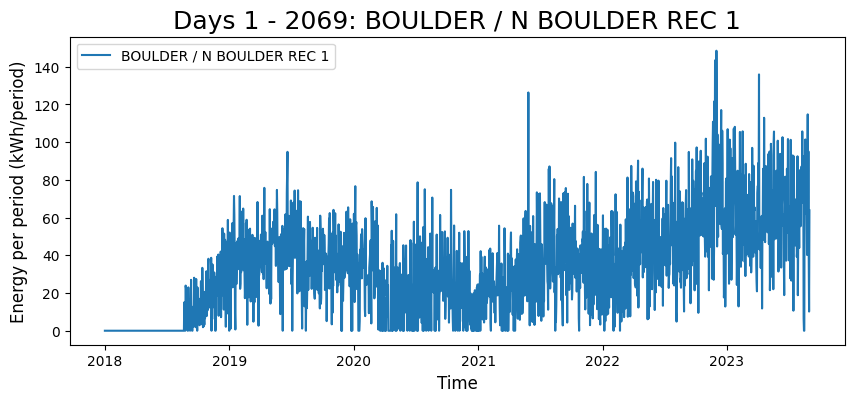

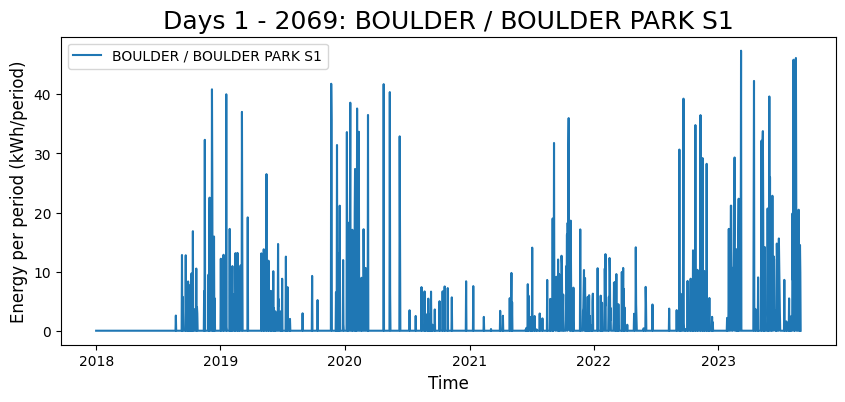

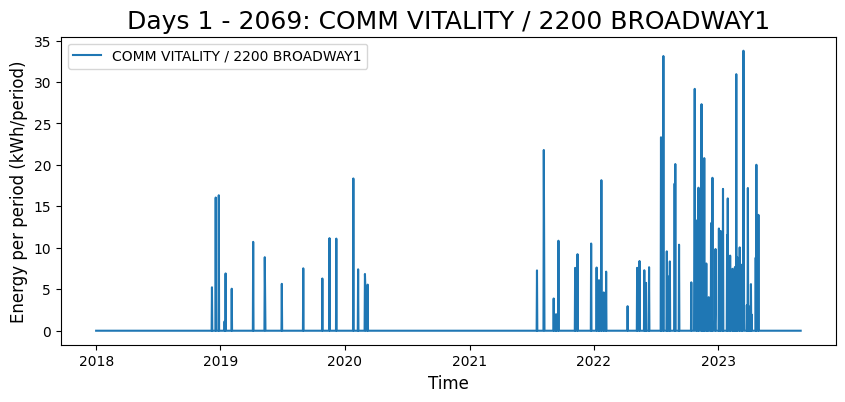

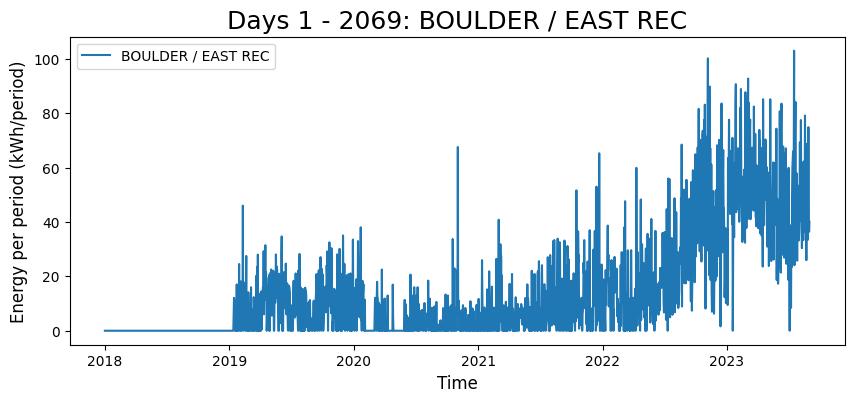

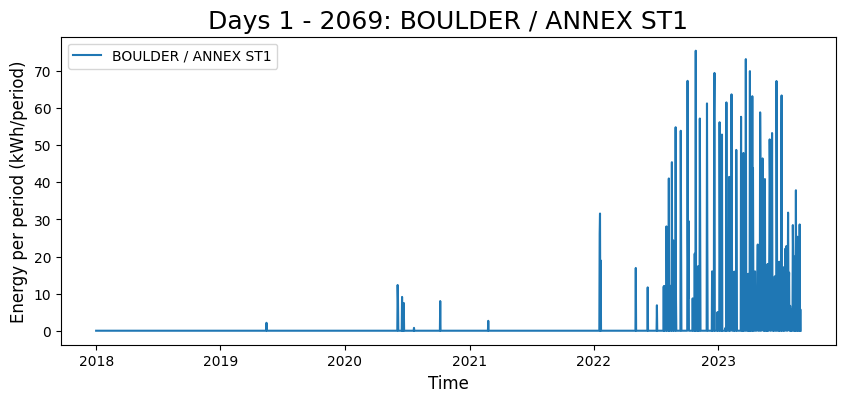

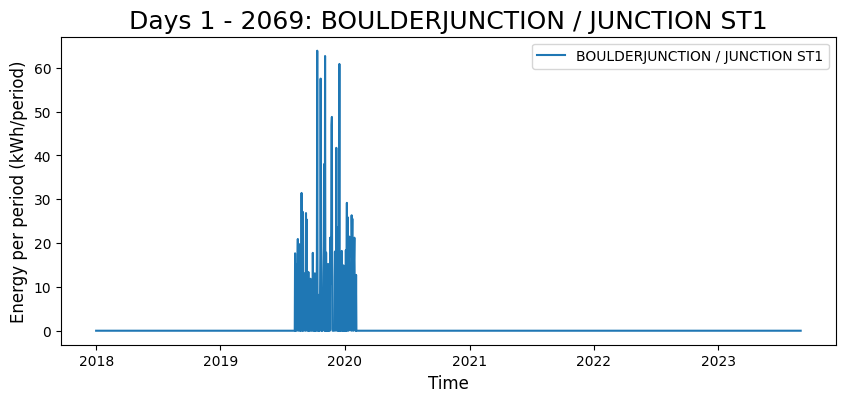

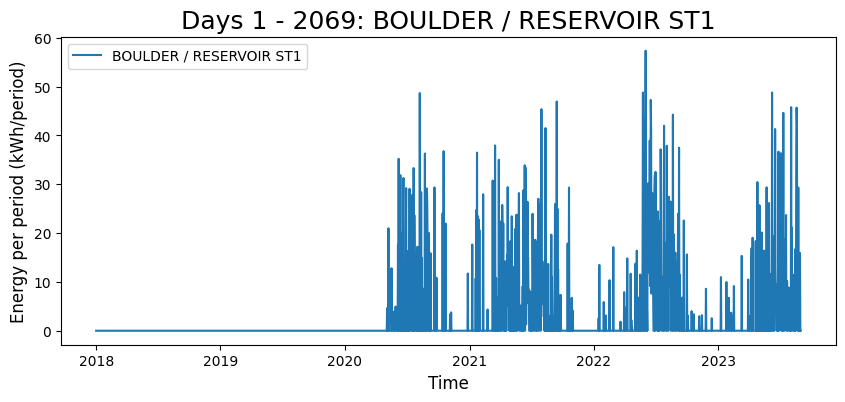

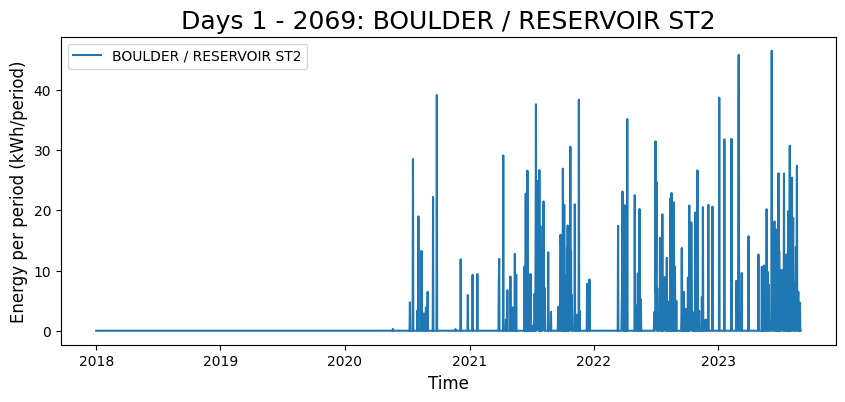

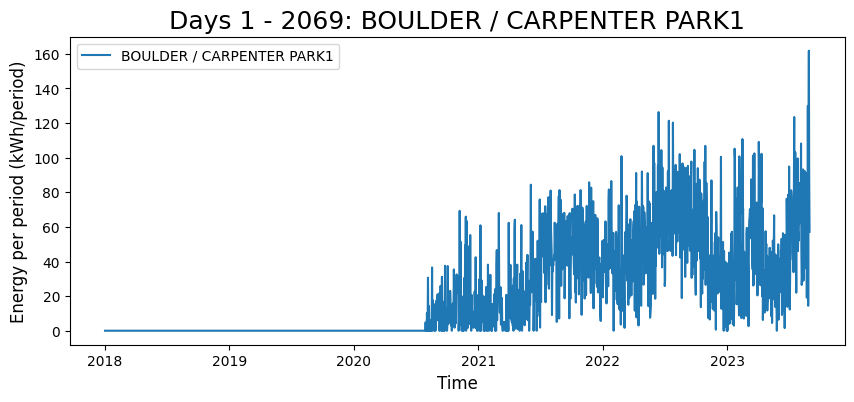

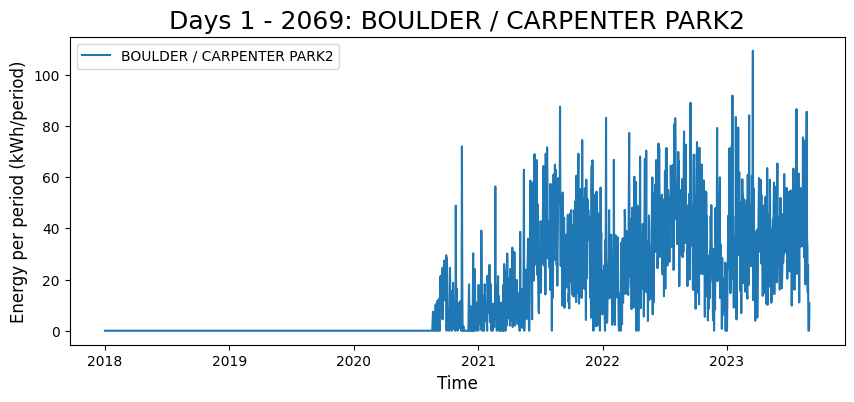

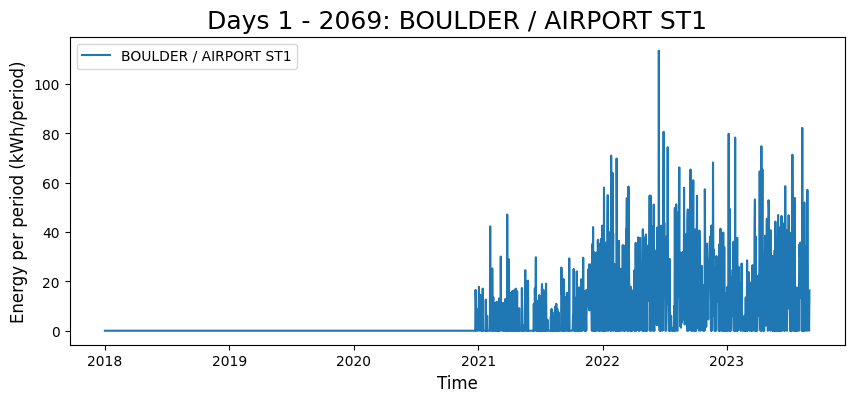

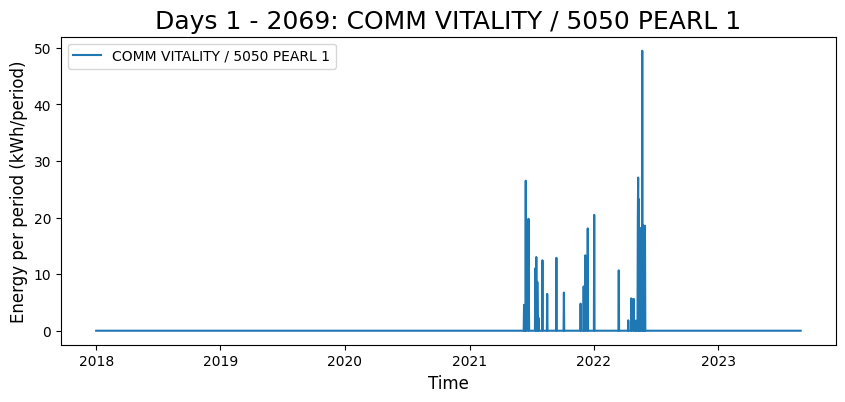

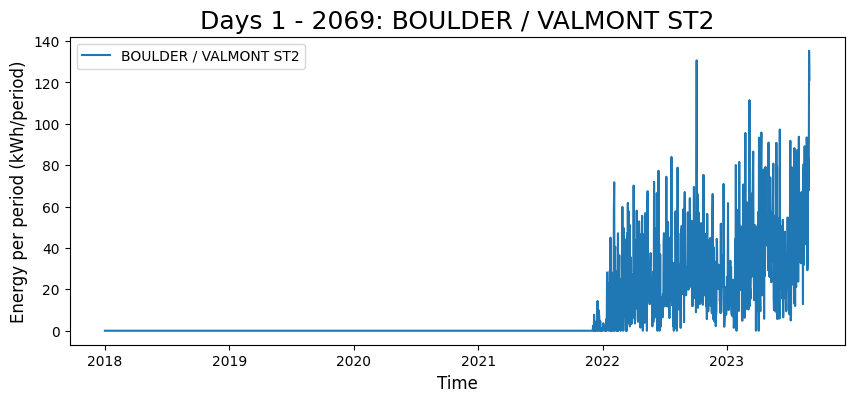

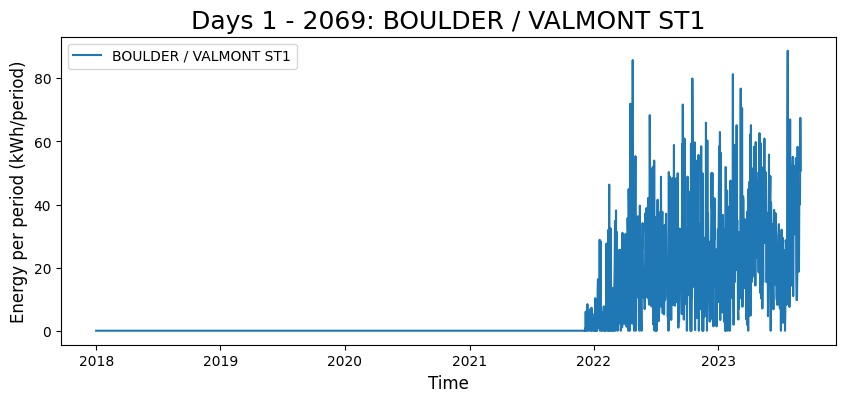

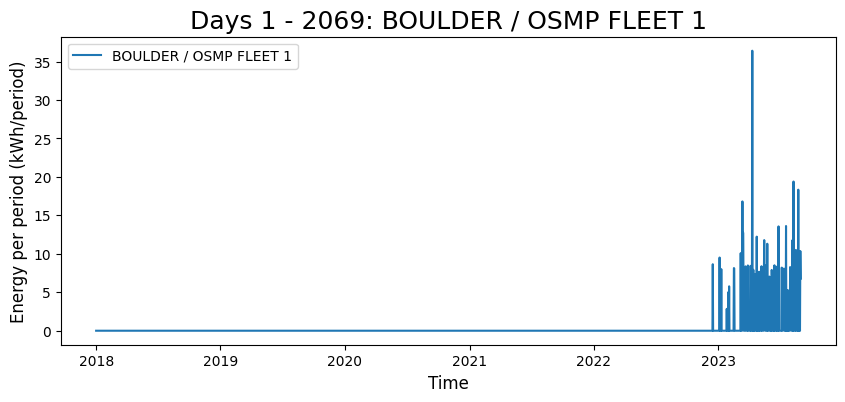

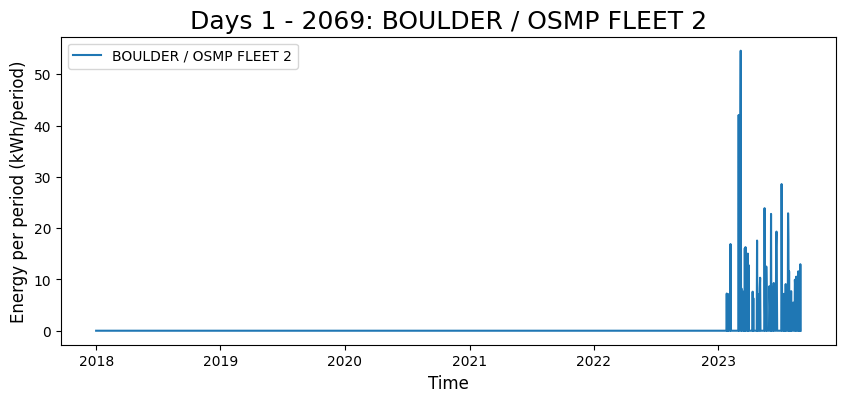

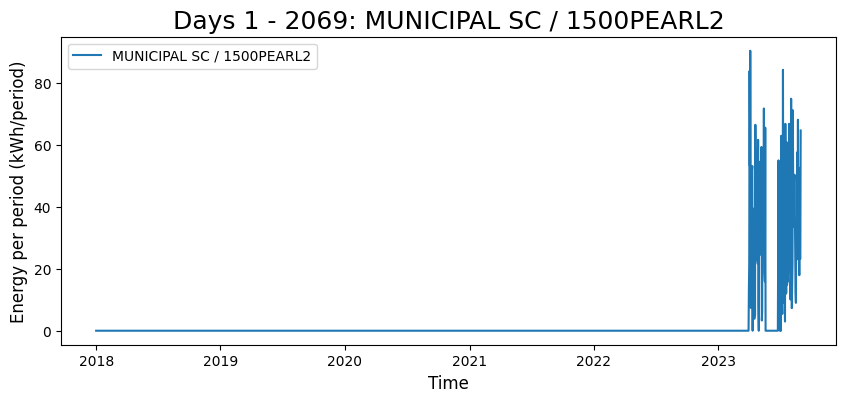

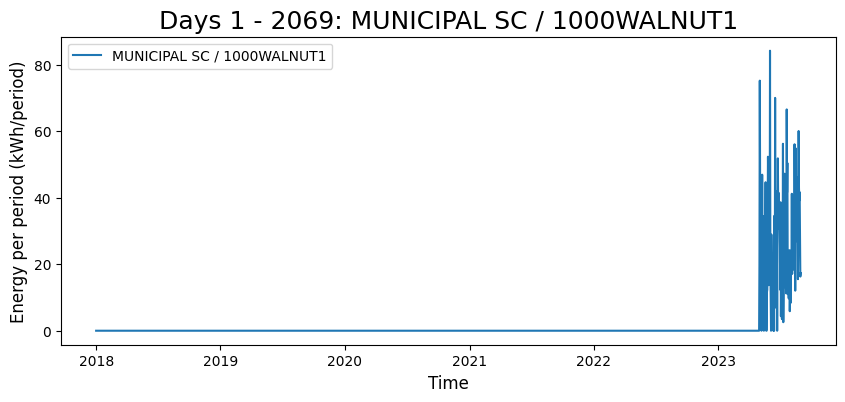

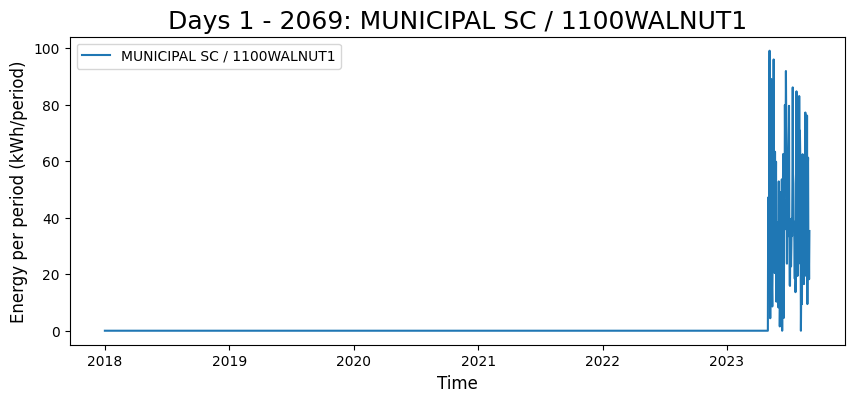

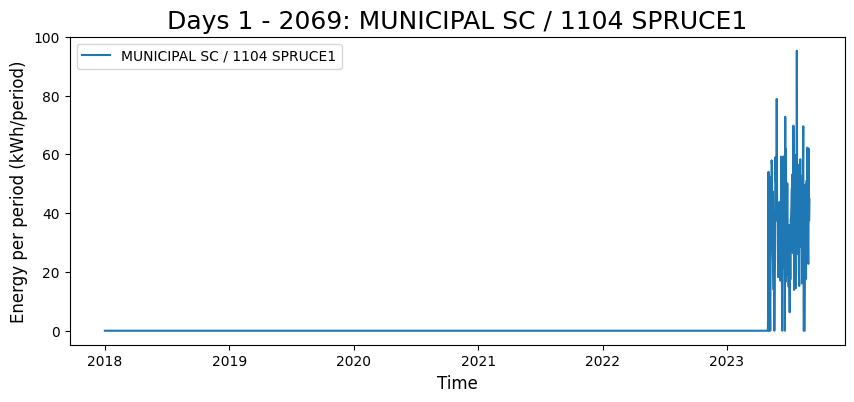

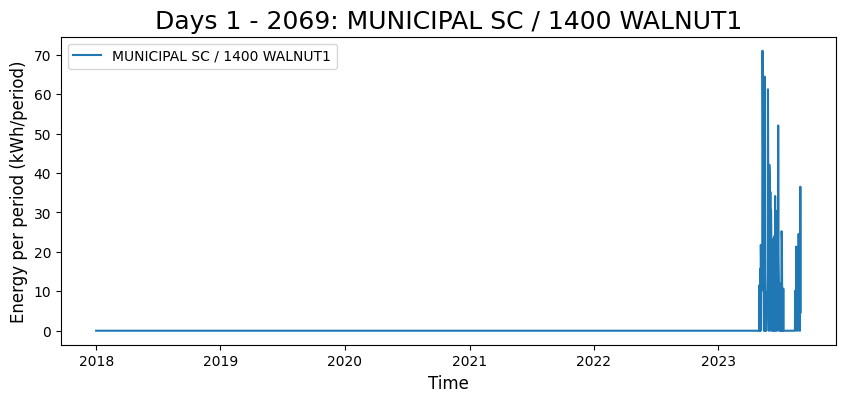

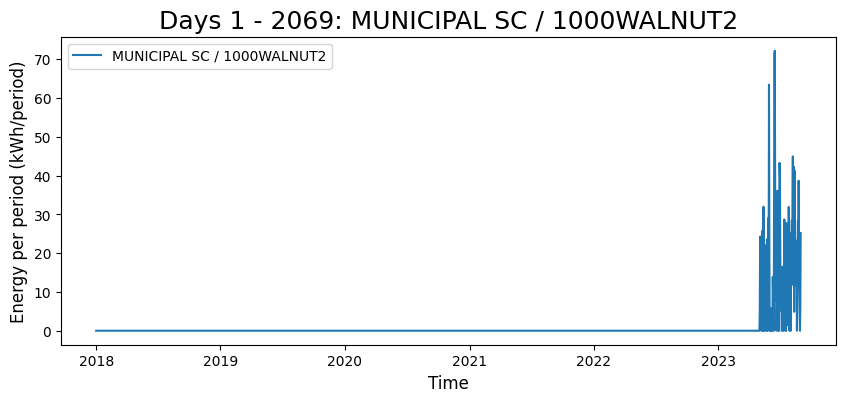

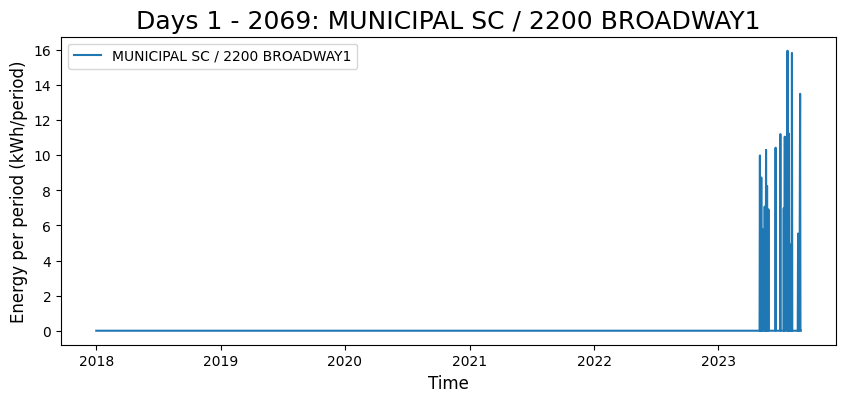

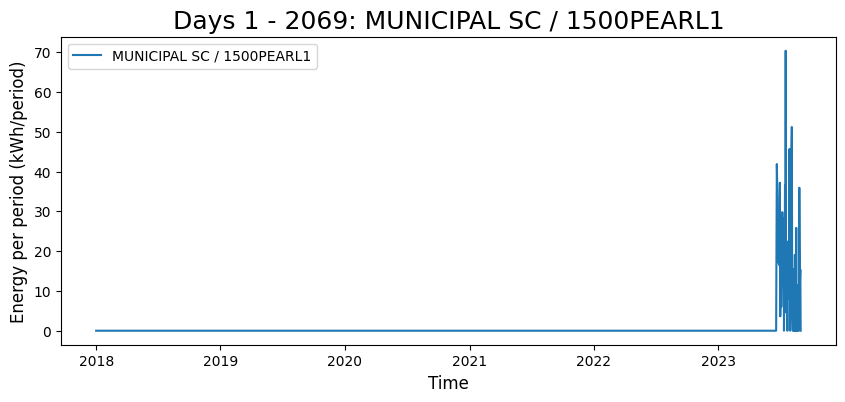

In [68]:
for s in Colo_stations:
    plotTimeInterval(Colo_1d, [s], days_start=1, days_end=len(Colo_1d))

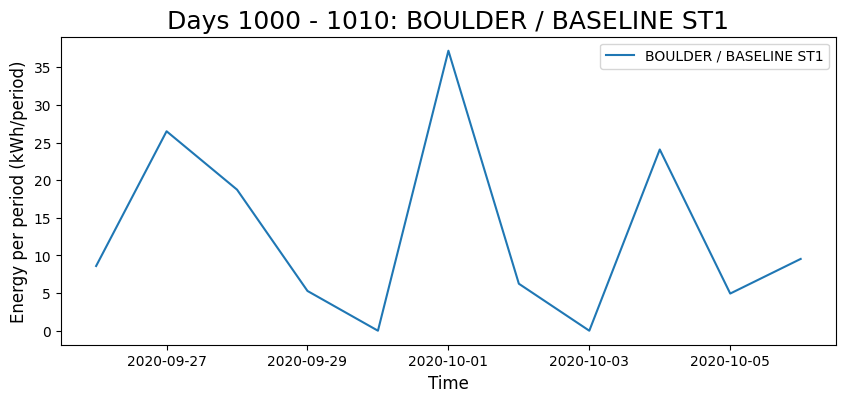

In [69]:
plotTimeInterval(Colo_1d, Colo_stations[[2]], days_start=1000, days_end=1010)

In [70]:
# Modificar para guardar
Colo_1d_tosave = Colo_1d.reset_index(inplace=False, names=['Time'])
Colo_1d_tosave.head(3)

Time  Power_BOULDER / JUNCTION ST1  Power_BOULDER / ALPINE ST1  \
0 2018-01-01                        6.5559                      0.0000   
1 2018-01-02                       14.1446                      0.0000   
2 2018-01-03                        3.5568                      9.5907   

   Power_BOULDER / BASELINE ST1  Power_BOULDER / FACILITIES ST1  \
0                        0.0000                             0.0   
1                        0.0000                             0.0   
2                        1.9125                             0.0   

   Power_COMM VITALITY / 1500PEARL2  Power_BOULDER / ATRIUM ST1  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   

   Power_BOULDER / REC CENTER ST2  Power_COMM VITALITY / 1000WALNUT2  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   

   Power_BOULDER / REC CENTER ST1  ...  Power_BOULDER / OSMP FLEET 1  \
0                             0.0  ...                           0.0   
1                             0.0  ...                           0.0   
2                             0.0  ...                           0.0   

   Power_BOULDER / OSMP FLEET 2  Power_MUNICIPAL SC / 1500PEARL2  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   

   Power_MUNICIPAL SC / 1000WALNUT1  Power_MUNICIPAL SC / 1100WALNUT1  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   

   Power_MUNICIPAL SC / 1104 SPRUCE1  Power_MUNICIPAL SC / 1400 WALNUT1  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   

   Power_MUNICIPAL SC / 1000WALNUT2  Power_MUNICIPAL SC / 2200 BROADWAY1  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   

   Power_MUNICIPAL SC / 1500PEARL1  
0                              0.0  
1                              0.0  
2                              0.0  

[3 rows x 41 columns]

In [71]:
Colo_1d_tosave.to_csv("./Colo_1d_kwh.csv", index=False)

## Agrupamos por semanas

In [19]:
Colo_1w = Colo_cont.groupby(pd.Grouper(freq='1W')).sum()
Colo_1w

Power_BOULDER / JUNCTION ST1  Power_BOULDER / ALPINE ST1  \
2018-01-07                       54.9016                      9.5907   
2018-01-14                       29.6280                     49.6566   
2018-01-21                       66.0428                      8.2288   
2018-01-28                       75.3329                     73.0573   
2018-02-04                       14.4284                     10.1928   
...                                  ...                         ...   
2023-08-06                        0.0000                    144.8160   
2023-08-13                        0.0000                    319.3646   
2023-08-20                        0.0000                    224.5678   
2023-08-27                        0.0000                    139.4930   
2023-09-03                        0.0000                     94.0753   

            Power_BOULDER / BASELINE ST1  Power_BOULDER / FACILITIES ST1  \
2018-01-07                       67.1243                         18.6624   
2018-01-14                      151.5600                         40.4289   
2018-01-21                       77.0776                         33.9744   
2018-01-28                      113.0730                         68.5887   
2018-02-04                      137.7659                         15.5343   
...                                  ...                             ...   
2023-08-06                      679.6353                        102.3265   
2023-08-13                      662.6716                         45.7429   
2023-08-20                      532.7857                         57.8516   
2023-08-27                      395.0201                         14.9188   
2023-09-03                      273.4565                         79.2404   

            Power_COMM VITALITY / 1500PEARL2  Power_BOULDER / ATRIUM ST1  \
2018-01-07                            0.7490                      1.9136   
2018-01-14                            0.0000                      6.6980   
2018-01-21                            0.0000                      0.0000   
2018-01-28                            8.3472                     39.4606   
2018-02-04                            4.1791                     23.9920   
...                                      ...                         ...   
2023-08-06                            0.0000                    276.6568   
2023-08-13                            0.0000                    188.3842   
2023-08-20                            0.0000                    163.8582   
2023-08-27                            0.0000                    274.9640   
2023-09-03                            0.0000                    102.8397   

            Power_BOULDER / REC CENTER ST2  Power_COMM VITALITY / 1000WALNUT2  \
2018-01-07                          0.0000                             0.0000   
2018-01-14                          0.0000                             0.0000   
2018-01-21                         16.2301                            22.9179   
2018-01-28                         21.0680                            13.2491   
2018-02-04                         20.5938                            42.6090   
...                                    ...                                ...   
2023-08-06                         69.2520                             0.0000   
2023-08-13                        145.4815                             0.0000   
2023-08-20                        538.5452                             0.0000   
2023-08-27                        518.2432                             0.0000   
2023-09-03                        269.9954                             0.0000   

            Power_BOULDER / REC CENTER ST1  Power_COMM VITALITY / 1500PEARL1  \
2018-01-07                          0.0000                            0.0000   
2018-01-14                          0.0000                            0.0000   
2018-01-21                         39.0695                            6.3831   
2018-01-28                  

In [20]:
Colo_cont.isnull().sum().sum(), Colo_1w.isnull().sum().sum()

(0, 0)

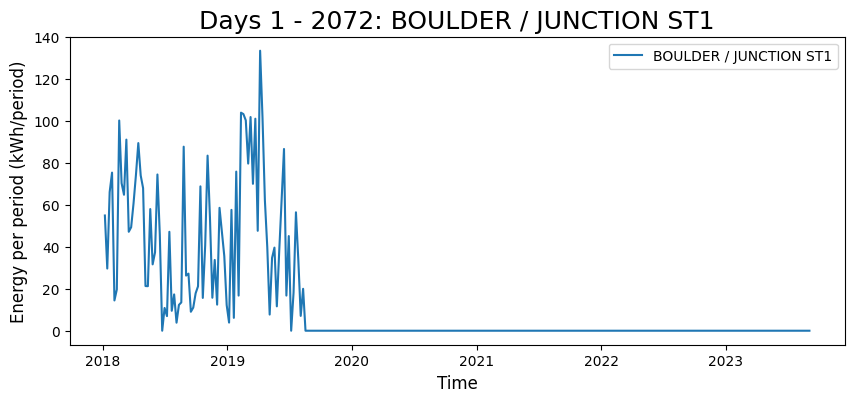

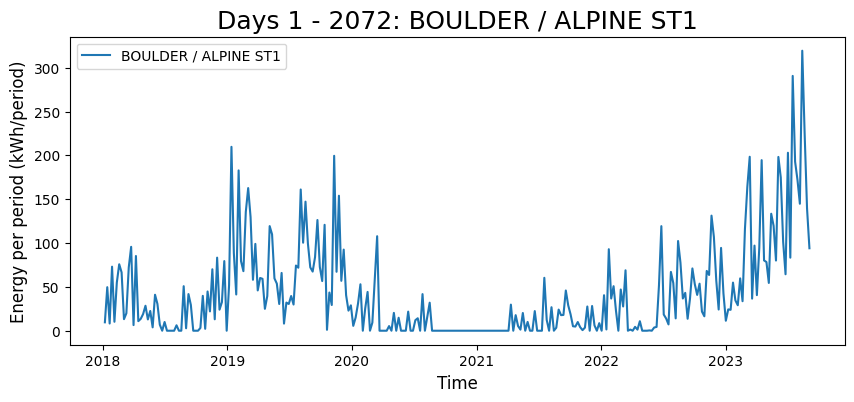

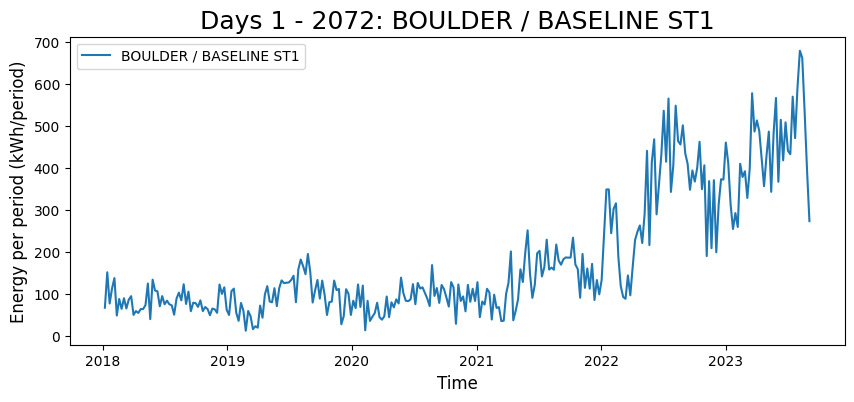

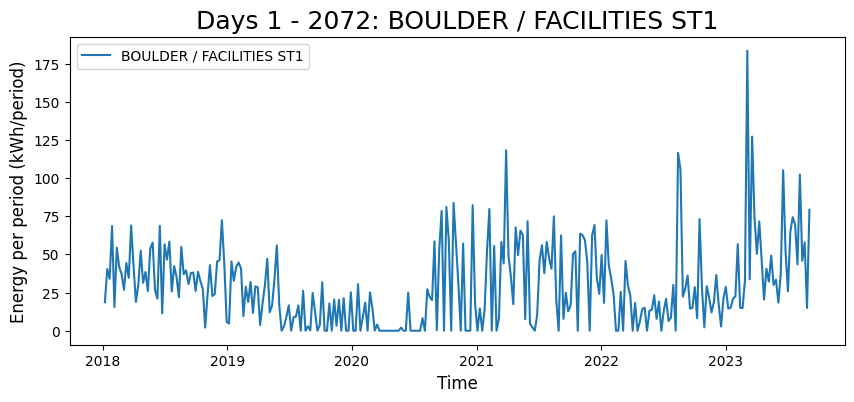

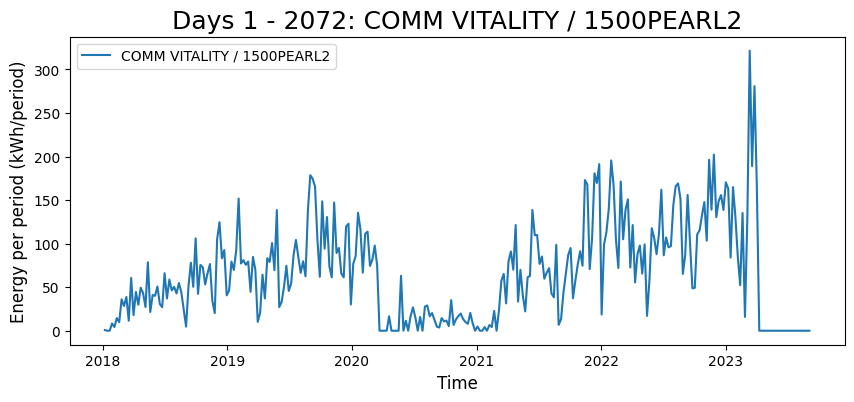

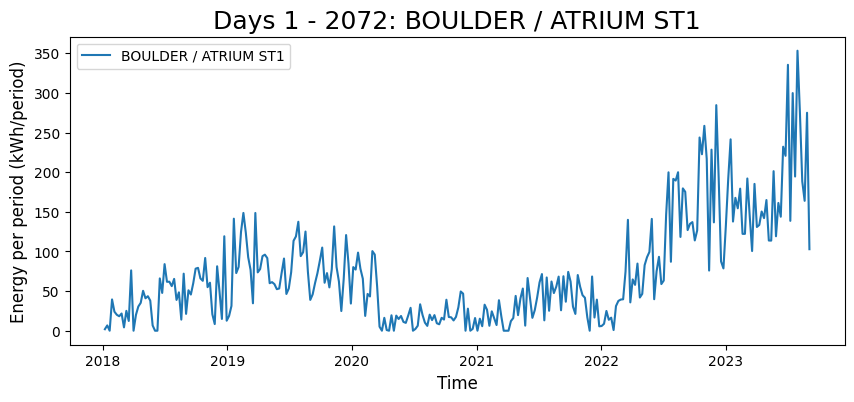

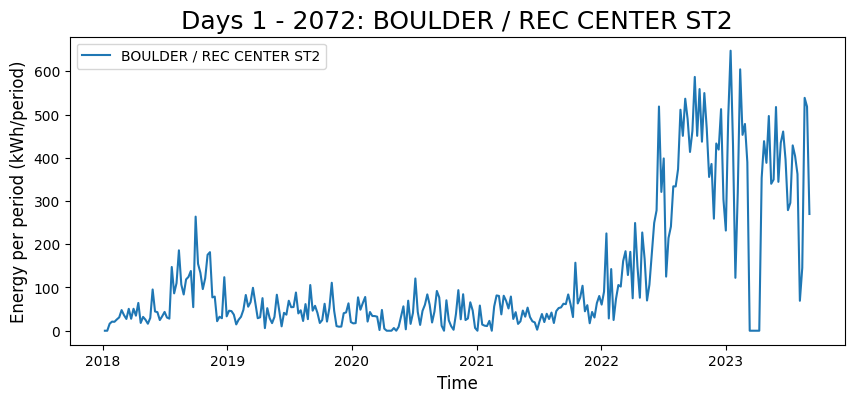

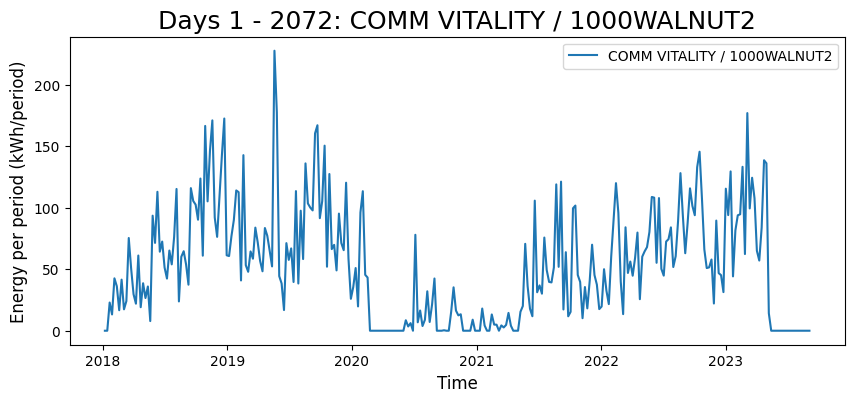

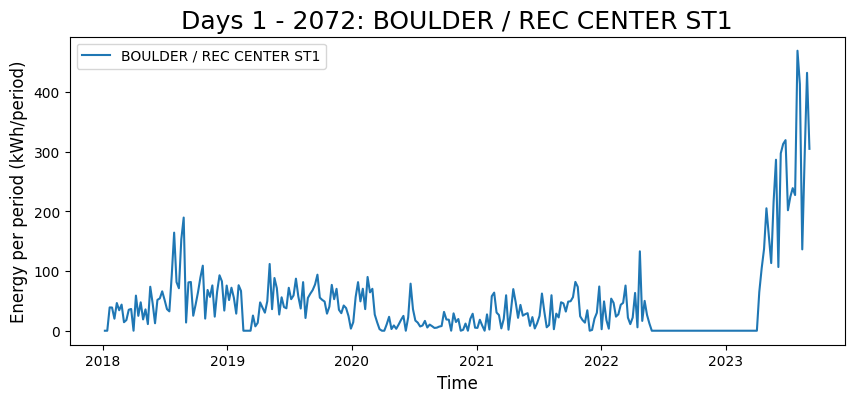

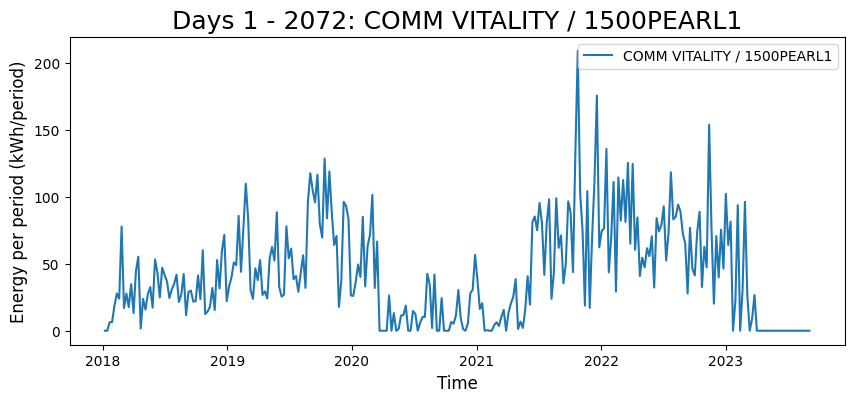

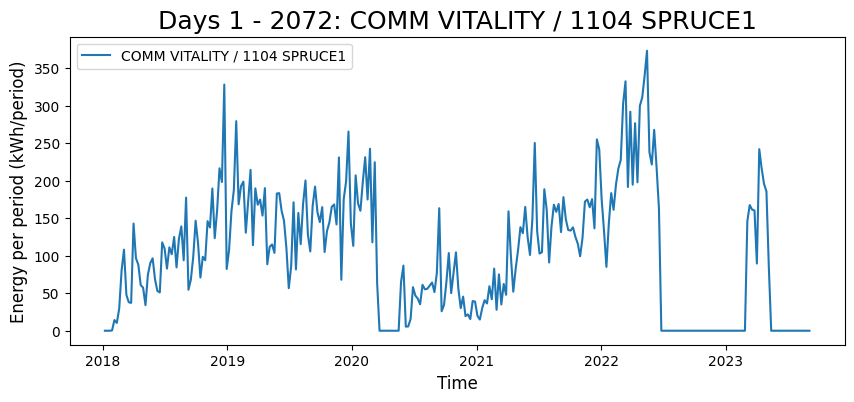

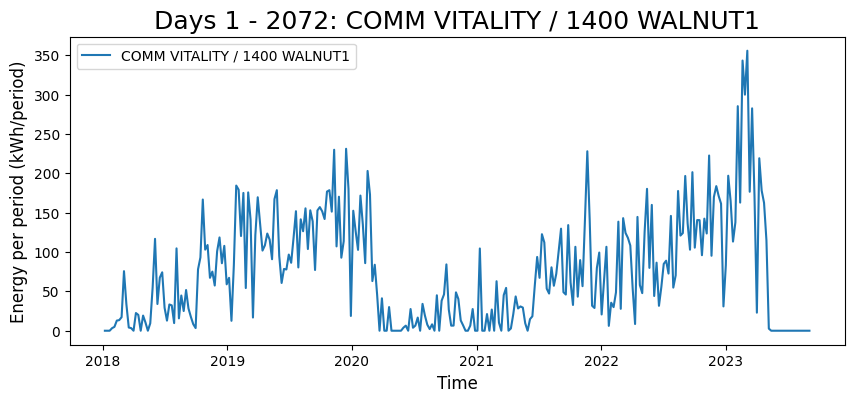

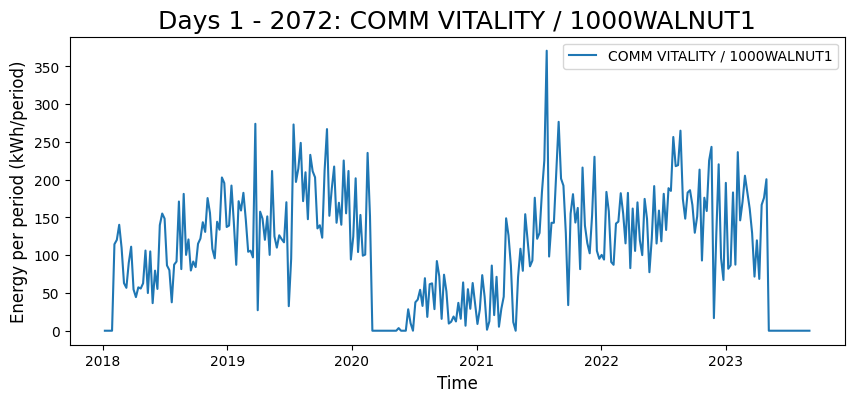

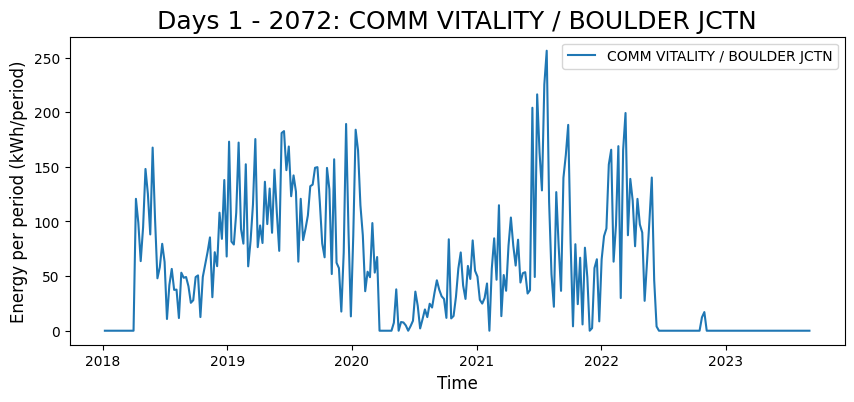

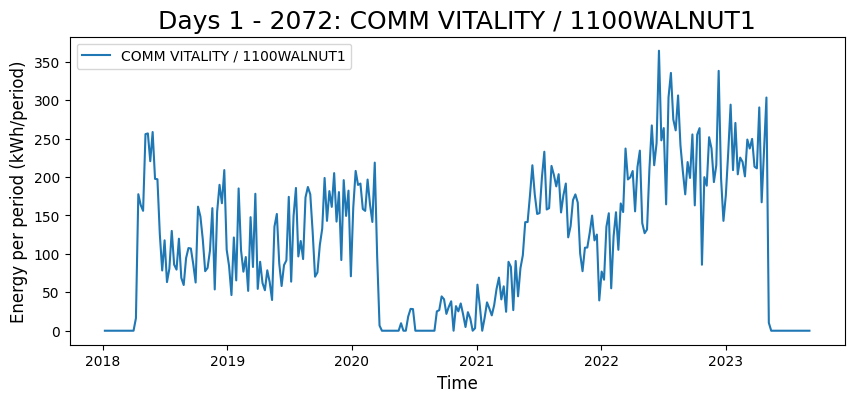

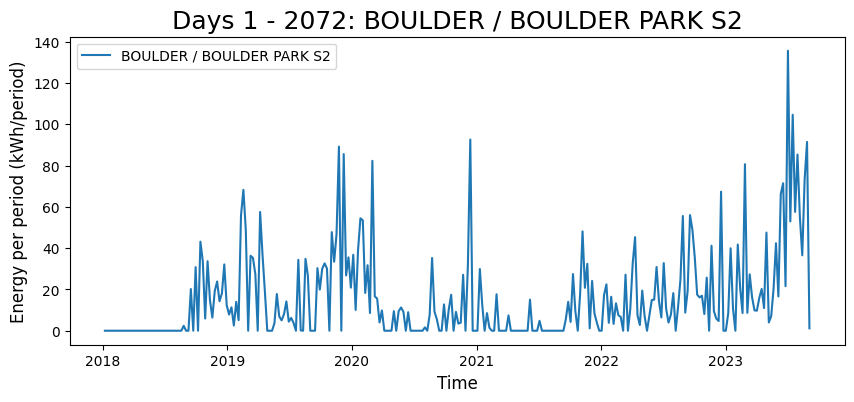

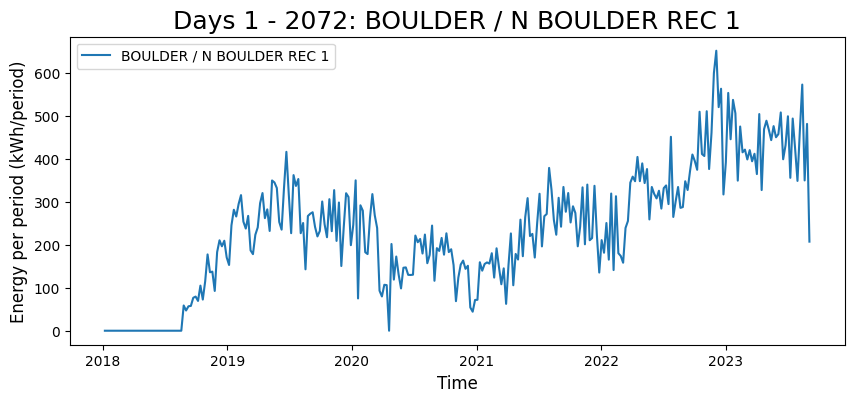

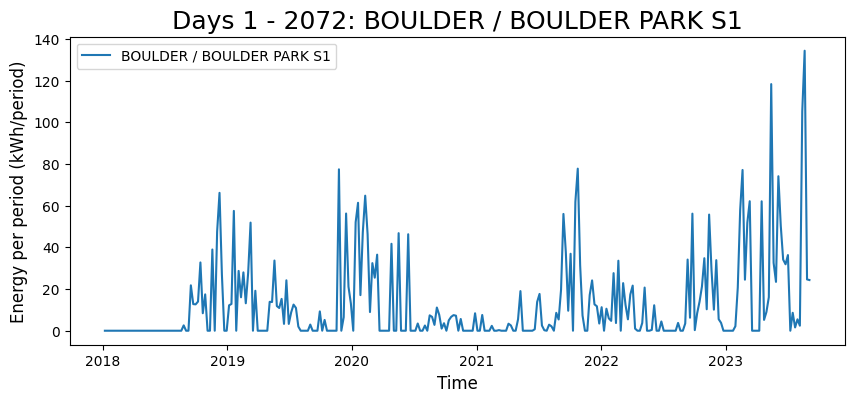

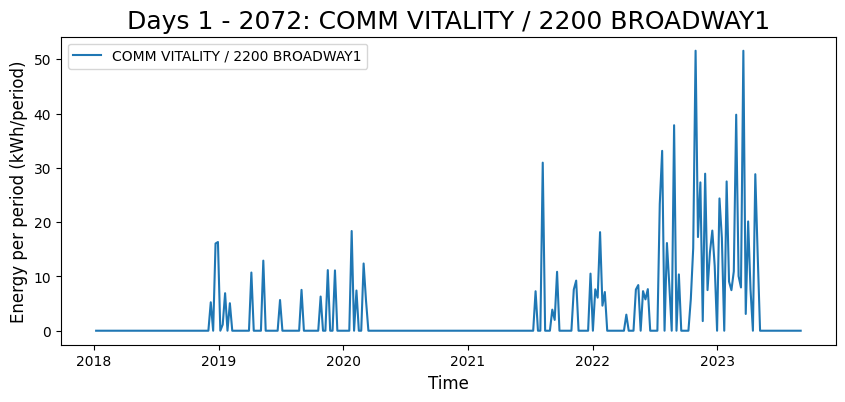

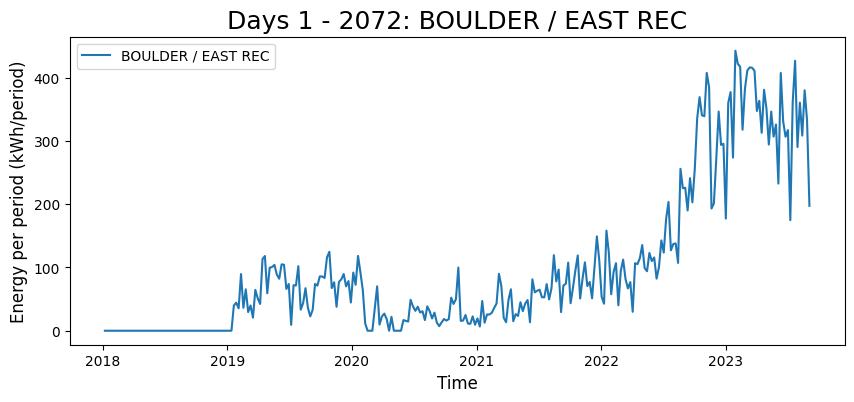

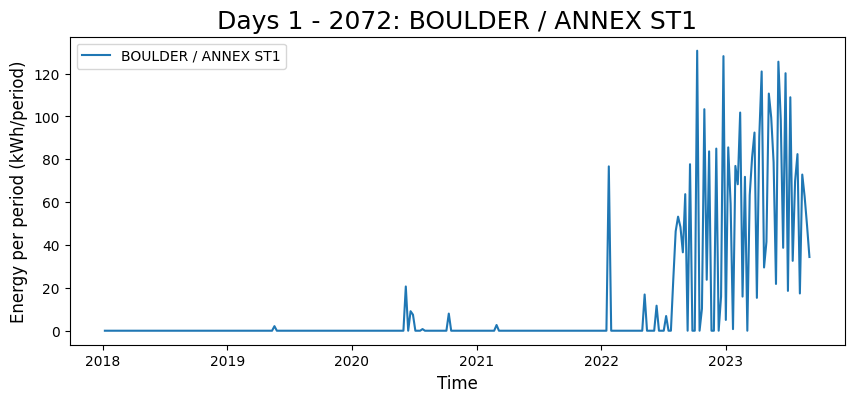

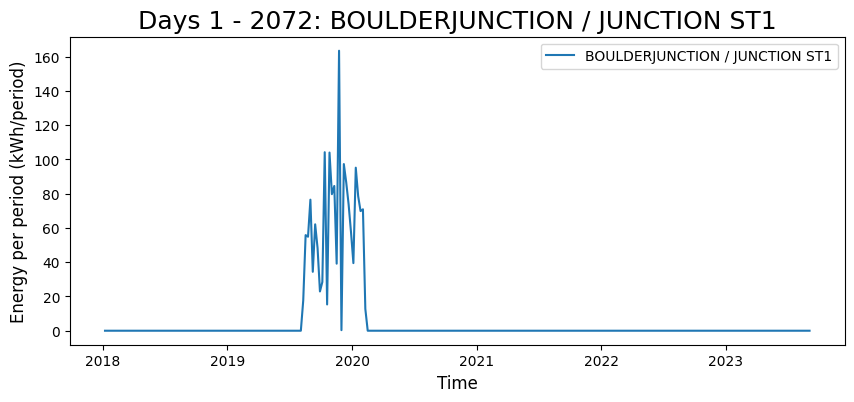

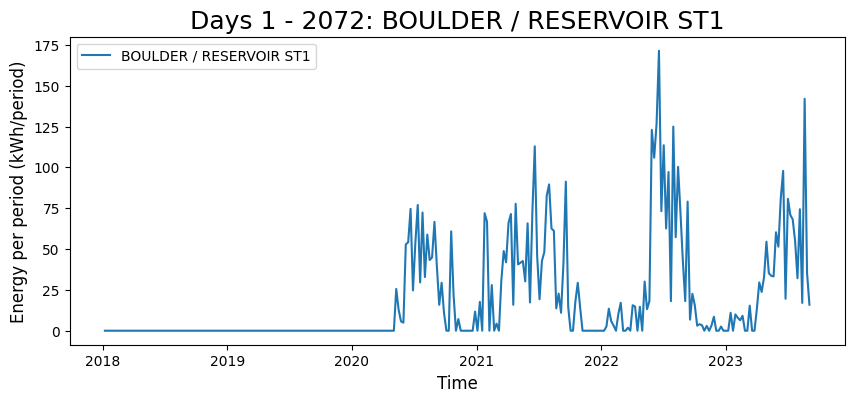

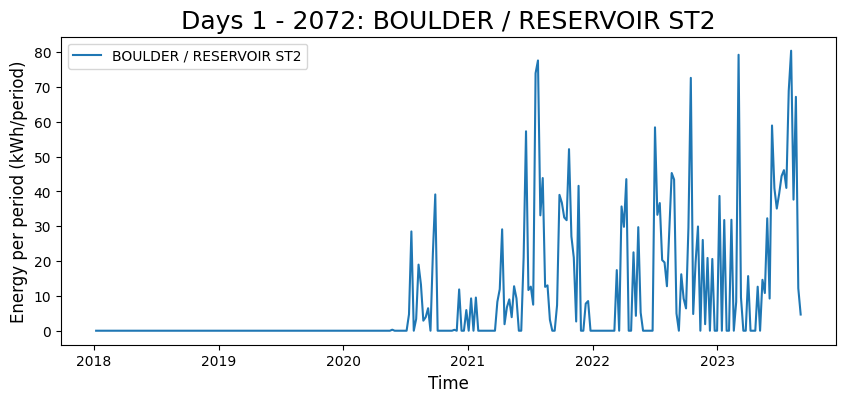

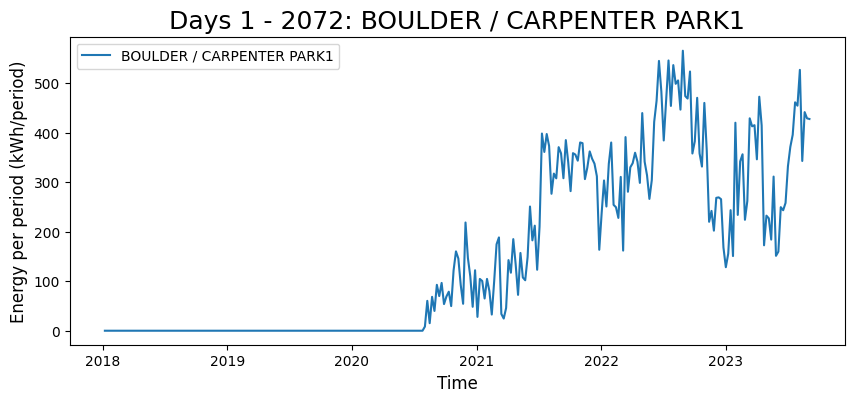

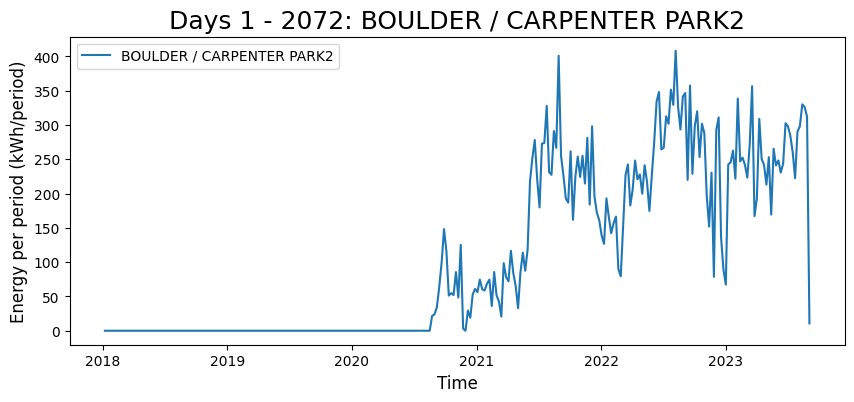

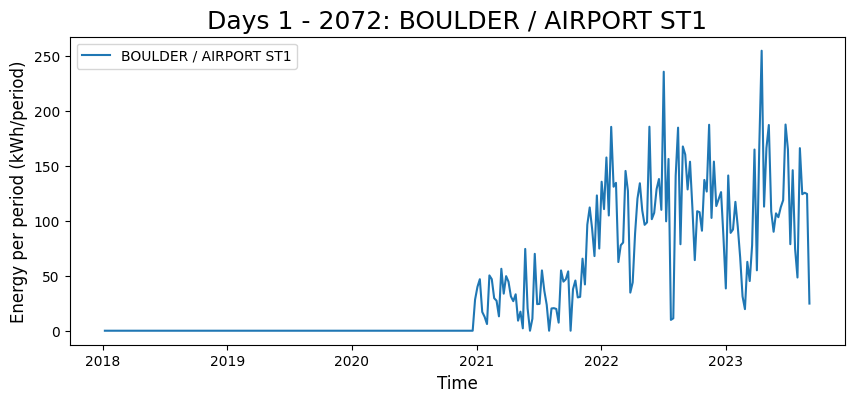

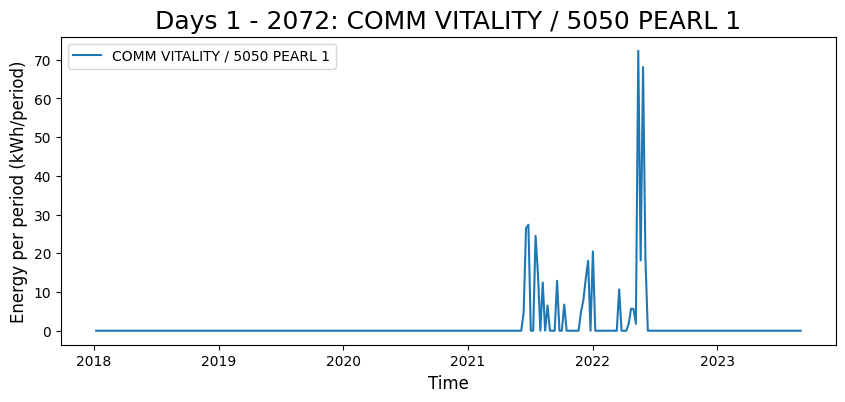

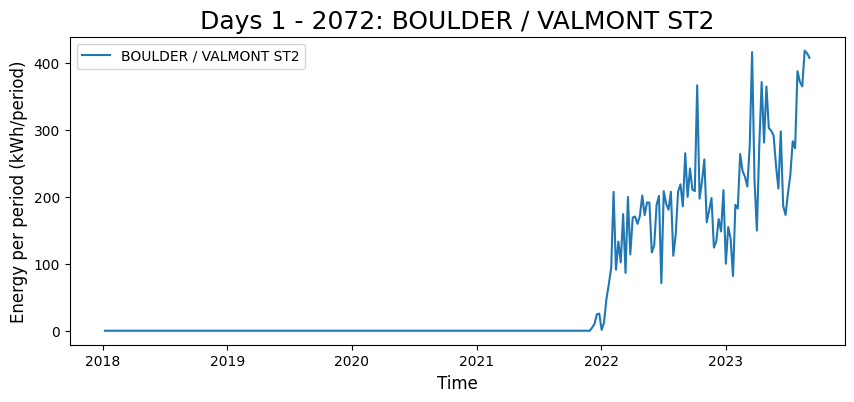

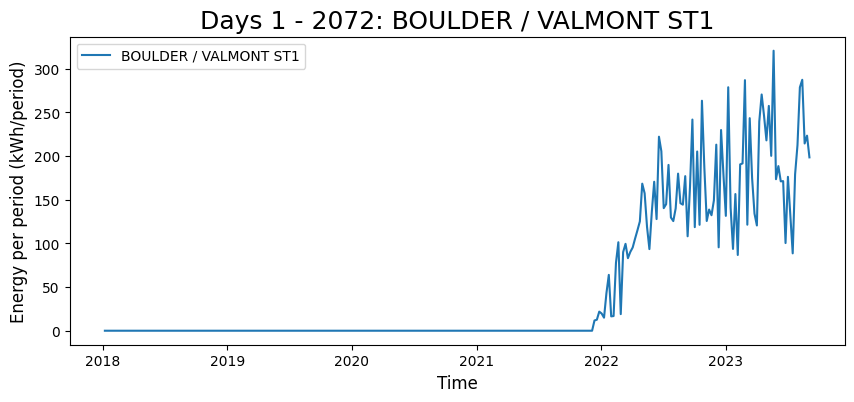

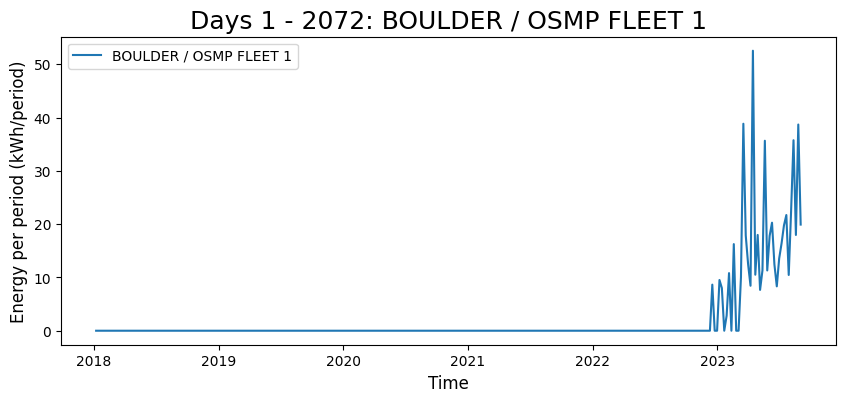

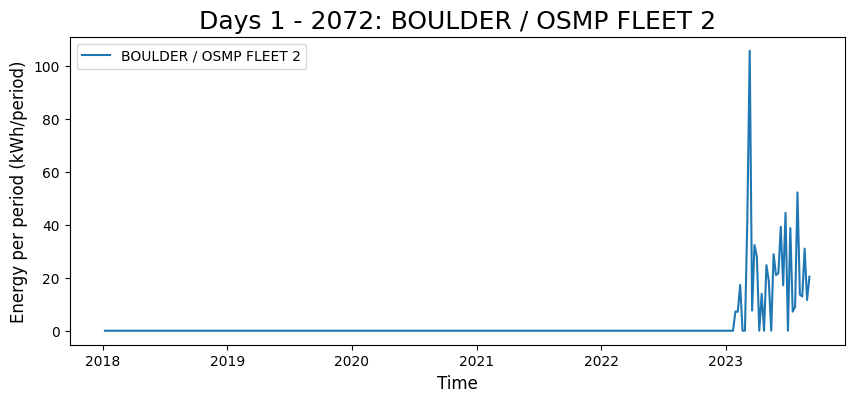

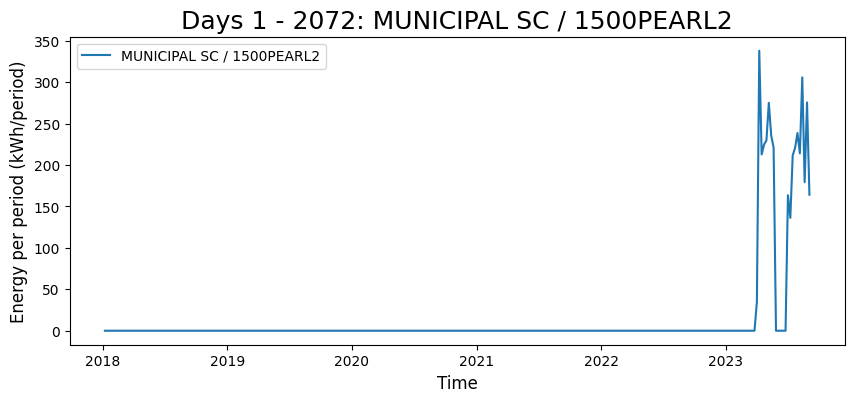

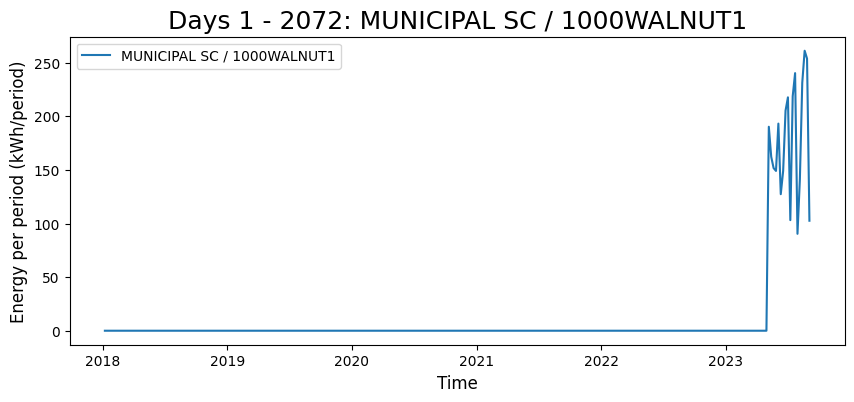

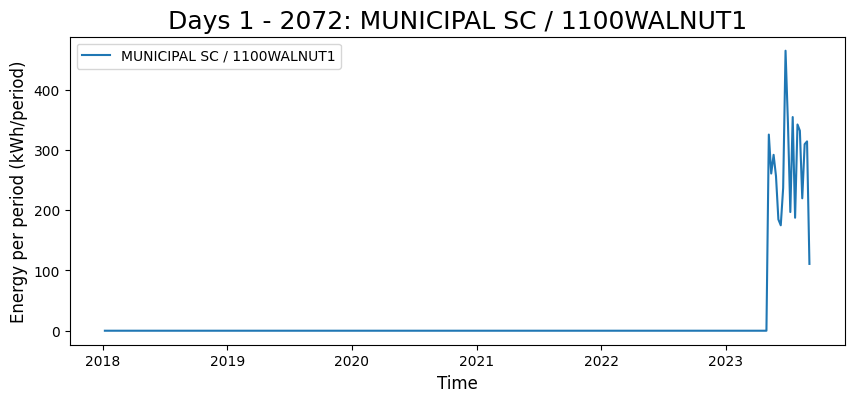

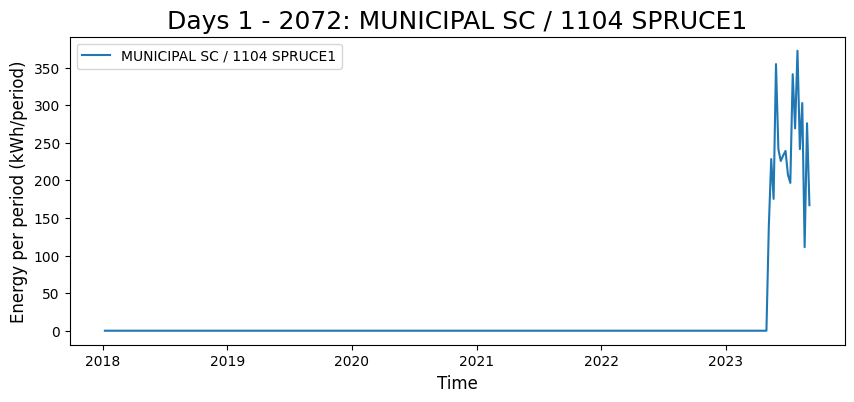

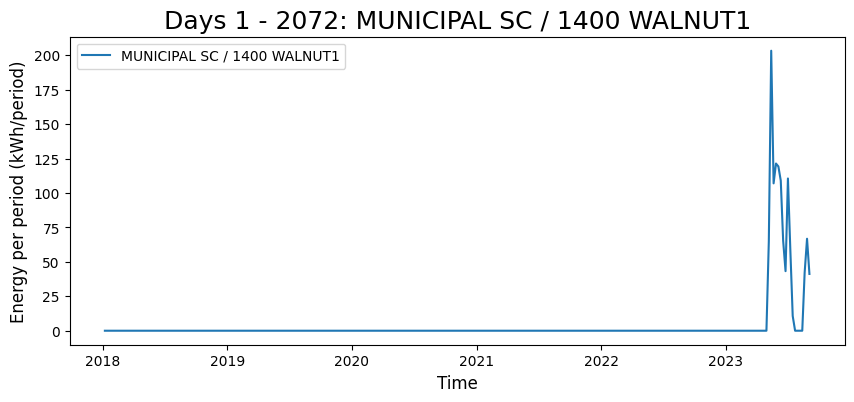

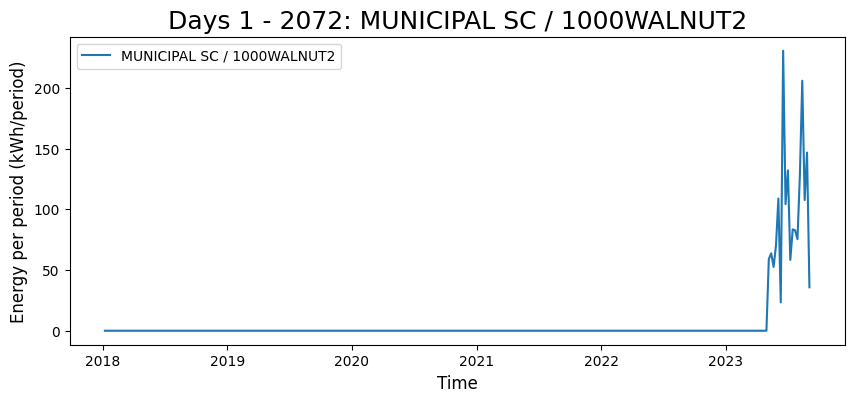

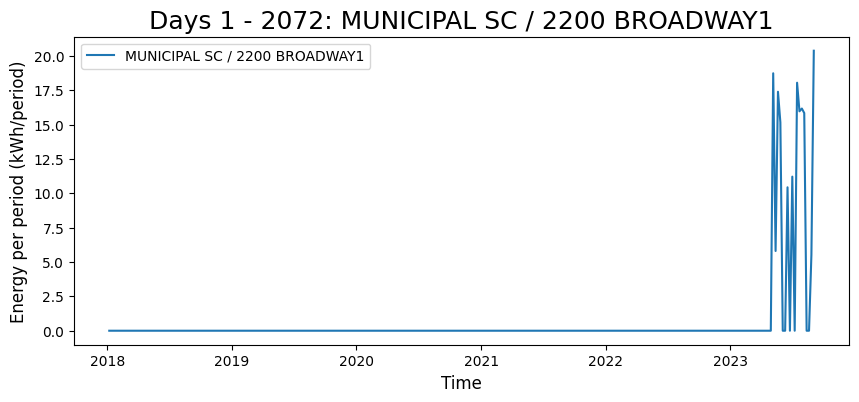

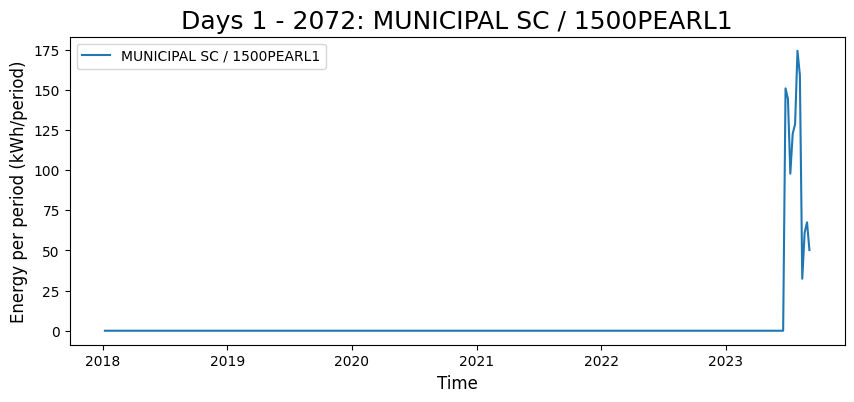

In [23]:
for s in Colo_stations:
    plotTimeInterval(Colo_1w, [s], days_start=1, days_end=len(Colo_1w)*7)

In [24]:
# Modificar para guardar
Colo_1w_tosave = Colo_1w.reset_index(inplace=False, names=['Time'])
Colo_1w_tosave.head(3)

Time  Power_BOULDER / JUNCTION ST1  Power_BOULDER / ALPINE ST1  \
0 2018-01-07                       54.9016                      9.5907   
1 2018-01-14                       29.6280                     49.6566   
2 2018-01-21                       66.0428                      8.2288   

   Power_BOULDER / BASELINE ST1  Power_BOULDER / FACILITIES ST1  \
0                       67.1243                         18.6624   
1                      151.5600                         40.4289   
2                       77.0776                         33.9744   

   Power_COMM VITALITY / 1500PEARL2  Power_BOULDER / ATRIUM ST1  \
0                             0.749                      1.9136   
1                             0.000                      6.6980   
2                             0.000                      0.0000   

   Power_BOULDER / REC CENTER ST2  Power_COMM VITALITY / 1000WALNUT2  \
0                          0.0000                             0.0000   
1                          0.0000                             0.0000   
2                         16.2301                            22.9179   

   Power_BOULDER / REC CENTER ST1  ...  Power_BOULDER / OSMP FLEET 1  \
0                          0.0000  ...                           0.0   
1                          0.0000  ...                           0.0   
2                         39.0695  ...                           0.0   

   Power_BOULDER / OSMP FLEET 2  Power_MUNICIPAL SC / 1500PEARL2  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   

   Power_MUNICIPAL SC / 1000WALNUT1  Power_MUNICIPAL SC / 1100WALNUT1  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   

   Power_MUNICIPAL SC / 1104 SPRUCE1  Power_MUNICIPAL SC / 1400 WALNUT1  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   

   Power_MUNICIPAL SC / 1000WALNUT2  Power_MUNICIPAL SC / 2200 BROADWAY1  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   

   Power_MUNICIPAL SC / 1500PEARL1  
0                              0.0  
1                              0.0  
2                              0.0  

[3 rows x 41 columns]

In [25]:
Colo_1w_tosave.to_csv("./Colo_1w_kwh.csv", index=False)